# 1. Downloading data from big query

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import db_dtypes
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from google.cloud import bigquery
from google.oauth2 import service_account
import os

In [3]:


creds = service_account.Credentials.from_service_account_file("./purple-25-gradient-20250605-9a86eb7ca8de.json")
client = bigquery.Client(credentials=creds, project="purple-25-gradient-20250605")

# List of tables to download
tables = [
    # "purple-25-gradient-20250605.chicago_active_business_licenses.active_business_licenses",
    # "purple-25-gradient-20250605.chicago_demographics.population_counts",
    # "purple-25-gradient-20250605.chicago_food_inspections.food_inspections_data",
    # "purple-25-gradient-20250605.chicago_zoning.zoning_data",
    # "purple-25-gradient-20250605.divvy_stations.divvy_stations_data",
    # "purple-25-gradient-20250605.foot_traffic_chicago.yearly_average",
    "purple-25-gradient-20250605.cta_bus_stations.cta_bus_stations_data"

]

# Folder where you want to save CSVs
output_dir = "data_exports"

import os
os.makedirs(output_dir, exist_ok=True)

# Download each table as a CSV
for table_id in tables:
    print(f"Downloading {table_id}...")
    query = f"SELECT * FROM `{table_id}`"
    df = client.query(query).to_dataframe()
    
    # Save to CSV (file name from table name)
    table_name = table_id.split('.')[-1]
    output_path = os.path.join(output_dir, f"{table_name}.csv")
    df.to_csv(output_path, index=False)

    print(f"Saved to {output_path}")


/Users/linda/Metrogrub/.venv/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1957: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



Saved to data_exports/cta_bus_stations_data.csv


## Uploading table back into bigquery

In [ ]:
from google.cloud import bigquery

# Define destination table: dataset_id.table_name (make in big query first)
table_id = "purple-25-gradient-20250605.chicago_active_business_licenses.business_licenses_v4_food_clean"

# Define the job config
job_config = bigquery.LoadJobConfig(
    write_disposition="WRITE_TRUNCATE",  # Overwrites the table if it exists
    autodetect=True                      # Automatically detects schema from DataFrame
)

# Upload the DataFrame to BigQuery
job = client.load_table_from_dataframe(
    business_license_v4_food, table_id, job_config=job_config
)

# Wait for the job to complete
job.result()

print(f"✅ DataFrame uploaded to {table_id}")


/Users/linda/Metrogrub/metrogrub_project/data_cleaning/.venv/lib/python3.11/site-packages/google/cloud/bigquery/_pandas_helpers.py:489: FutureWarning:

Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'



✅ DataFrame uploaded to purple-25-gradient-20250605.chicago_active_business_licenses.business_licenses_v4_food_clean


In [1]:
import os
print(os.getcwd())

/Users/linda/Metrogrub/metrogrub_project/data_cleaning


In [6]:
# Loading Data
business_license = pd.read_csv(
    'data_exports/active_business_licenses.csv',
    dtype={'zip_code': str},  # force zip_code column to be string
    header='infer'
)

divvy_stations = pd.read_csv('data_exports/divvy_stations_data.csv', header='infer')
food_inspections = pd.read_csv('data_exports/food_inspections_data.csv', header='infer')
population_counts = pd.read_csv('data_exports/population_counts.csv', header='infer')
yearly_average = pd.read_csv('data_exports/yearly_average.csv', header='infer')
zoning_data = pd.read_csv('data_exports/zoning_data.csv', header='infer')
bus_data = pd.read_csv('data_exports/cta_bus_stations_data.csv', header='infer')
# zoning_data.head()

# 2. Perfoming EDA (Exploratory Data Analysis)


## 2.1 Active Business Licenses

In [86]:
business_license.head()

,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,ward,precinct,ward_precinct,police_district,community_area,community_area_name,neighborhood,license_code,license_description,business_activity_id,business_activity,license_number,application_type,application_requirements_complete,payment_date,conditional_approval,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,latitude,longitude,location
0,3025375-20250502,3025375,463149,6,LAO PENG YOU LLC,LAO PENG YOU,2020 W CHICAGO AVE,CHICAGO,IL,60622,36.0,21.0,36-21,12.0,24.0,WEST TOWN,UKRAINIAN VILLAGE,1329,Special Event Food,946.0,180 Day Multiple Events - Special Event Food,3025375,ISSUE,2025-04-16 00:00:00+00:00,2025-04-16 00:00:00+00:00,N,2025-05-02 00:00:00+00:00,2025-10-27 00:00:00+00:00,2025-05-01 00:00:00+00:00,2025-05-02 00:00:00+00:00,AAI,41.896005,-87.677938,"{""type"": ""Point"", ""coordinates"": [-87.6779378973854, 41.896004699879654]}"
1,3026047-20250501,3026047,516305,1,MATTHEW APGAR,MATTHEW APGAR,[REDACTED FOR PRIVACY],CHICAGO,IL,60614,NaN,16.0,-16,19.0,7.0,LINCOLN PARK,SHEFFIELD & DEPAUL,7009,Pharmaceutical Representative,990.0,Markets / Promotes Pharmaceuticals to Health Care Professionals and Conducts Business for More than 15 Calendar Days per Year,3026047,ISSUE,2025-04-30 00:00:00+00:00,2025-04-30 00:00:00+00:00,N,2025-05-01 00:00:00+00:00,2026-05-15 00:00:00+00:00,2025-04-30 00:00:00+00:00,2025-05-01 00:00:00+00:00,AAI,0.000000,0.000000,NaN
2,2615773-20250501,3013467,392036,1,"CHICAGO PRIVATE YACHT RENTALS, INC","CHICAGO PRIVATE YACHT RENTALS, INC",6932 N DOWAGIAC AVE,CHICAGO,IL,60646,45.0,9.0,45-9,16.0,12.0,FOREST GLEN,"SAUGANASH,FOREST GLEN",7020,Commercial Passenger Vessel,1012.0,Operation of a Commercial Passenger Vessel - 20 or More Passengers,2615773,RENEW,2025-02-15 00:00:00+00:00,2025-03-19 00:00:00+00:00,N,2025-05-01 00:00:00+00:00,2026-04-30 00:00:00+00:00,2025-04-30 00:00:00+00:00,2025-04-30 00:00:00+00:00,AAI,42.006666,-87.767159,"{""type"": ""Point"", ""coordinates"": [-87.76715933374193, 42.00666641852602]}"
3,2615905-20250501,3025740,360866,1,"CHICAGO SAILBOAT CHARTERS, INC.",CHICAGO SAILBOAT CHARTERS INC.,13539 S FOREST AVE,CHICAGO,IL,60827,10.0,26.0,10-26,5.0,54.0,RIVERDALE,RIVERDALE,7020,Commercial Passenger Vessel,1011.0,Operation of a Commercial Passenger Vessel - Under 20 Passengers,2615905,RENEW,2025-04-24 00:00:00+00:00,2025-04-28 00:00:00+00:00,N,2025-05-01 00:00:00+00:00,2026-04-30 00:00:00+00:00,2025-04-29 00:00:00+00:00,2025-04-29 00:00:00+00:00,AAI,41.648779,-87.614742,"{""type"": ""Point"", ""coordinates"": [-87.61474160509368, 41.64877912429937]}"
4,2738095-20250501,3014267,468358,1,JUST RIGHT BOATING LLC,JUST RIGHT BOATING LLC,1201 E MADISON PARK 1,CHICAGO,IL,60615,4.0,23.0,4-23,2.0,39.0,KENWOOD,KENWOOD,7020,Commercial Passenger Vessel,1011.0,Operation of a Commercial Passenger Vessel - Under 20 Passengers,2738095,RENEW,2025-02-15 00:00:00+00:00,2025-03-03 00:00:00+00:00,N,2025-05-01 00:00:00+00:00,2026-04-30 00:00:00+00:00,2025-04-04 00:00:00+00:00,2025-04-04 00:00:00+00:00,AAI,41.802935,-87.596642,"{""type"": ""Point"", ""coordinates"": [-87.59664183166099, 41.80293463173875]}"


### Cleaning & transformation

In [179]:
# Selecting necessary Columns
columns_to_keep = [
    'license_id',
    'doing_business_as_name',
    'legal_name',
    # 'business_activity_id',
    'license_description',
    'business_activity',
    'latitude',
    'longitude',
    'city',
    'state',
    'address',
    'zip_code',
    'location'
]

# Select only the desired columns
business_license_v2 = business_license[columns_to_keep]
# Remove rows with no location data, no zip code, no buziness_activity
business_license_v2 = business_license_v2[business_license_v2['location'].notna()]
business_license_v2 = business_license_v2[business_license_v2['zip_code'].notna()]
business_license_v2 = business_license_v2[business_license_v2['business_activity'].notna()]
# Replace redacted in address with NaN value
business_license_v2['address'] = business_license_v2['address'].replace(r'\[REDACTED.*\]', np.nan, regex=True)
# Remove businesses that are located outside of IL (check shows a lot of debt collection licenses)
business_license_v2 = business_license_v2[business_license_v2['state'] == 'IL']
# Drop State col after filtering 
business_license_v2 = business_license_v2.drop(columns=['state'])
# Filter for food
business_license_v2_food = business_license_v2[
    business_license_v2['license_description'].str.contains('food', case=False, na=False)
]
# Remove duplicates of same biz license_id (keep only first one)
business_license_v3_food = business_license_v2_food.drop_duplicates(subset='license_id', keep='first')

def categorize_food_place(row):
    desc = str(row['license_description']).lower()
    name = str(row['doing_business_as_name']).lower()
    activity = str(row.get('business_activity', '')).lower()

    # Direct license-based categorization
    if 'mobile food' in desc:
        return 'food_truck'
    elif 'shared kitchen' in desc:
        return 'shared_kitchen'
    elif 'wholesale' in desc:
        return 'wholesale'
    elif 'special event' in desc:
        return 'event_food'
    elif 'pop-up' in desc:
        return 'pop_up'
    elif 'seasonal lakefront' in desc:
        return 'lakefront'

    # Name-based categorization for Retail Food
    fast_food_keywords = ['mcdonald', 'burger king', 'kfc', 'wendy', 'popeyes', 'subway', 'chipotle', 'taco bell', 'pizza hut', 'dunkin','shake shack', 'jack in the box']
    fine_dining_keywords = ['steakhouse', 'grill', 'bistro', 'chophouse', 'prime', 'fine dining']
    cafe_keywords = ['coffee', 'cafe', 'espresso', 'tea']
    bar_keywords = ['bar', 'pub', 'tavern', 'lounge']

    if any(kw in name for kw in fast_food_keywords):
        return 'fast_food'
    elif any(kw in name for kw in fine_dining_keywords):
        return 'fine_dining'
    elif any(kw in name for kw in cafe_keywords):
        return 'cafe'
    elif any(kw in name for kw in bar_keywords):
        return 'bar'
    else:
        return 'restaurant'  # fallback for Retail Food
    
business_license_v4_food = business_license_v3_food.copy()
business_license_v4_food['food_category'] = business_license_v3_food.apply(categorize_food, axis=1)
business_license_v4_food.head()

business_license_v4_food.head(10)

,license_id,doing_business_as_name,legal_name,license_description,business_activity,latitude,longitude,city,address,zip_code,location,food_category
0,3025375,LAO PENG YOU,LAO PENG YOU LLC,Special Event Food,180 Day Multiple Events - Special Event Food,41.896005,-87.677938,CHICAGO,2020 W CHICAGO AVE,60622,"{""type"": ""Point"", ""coordinates"": [-87.6779378973854, 41.896004699879654]}",event_food
7,3025642,CHILLS ITALIAN ICE,LEMONCHILLO LLC,Special Event Food,180 Day Multiple Events - Special Event Food,41.903060,-87.678437,CHICAGO,2029 W DIVISION ST 1,60622,"{""type"": ""Point"", ""coordinates"": [-87.67843725836676, 41.903059772046284]}",event_food
8,3020896,TACO PROS/EGG HOLIC,1400 LAKE PARK INC.,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,41.809795,-87.592374,CHICAGO,1400 E 47TH DR E,60653,"{""type"": ""Point"", ""coordinates"": [-87.59237386663331, 41.80979548271692]}",restaurant
9,3020976,SAM 95 FOOD INC.,SAM 95 FOOD INC.,Retail Food Establishment,Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods,41.721357,-87.659962,CHICAGO,1452 W 95TH ST 1ST,60643,"{""type"": ""Point"", ""coordinates"": [-87.65996168027644, 41.72135685967372]}",restaurant
18,3020057,STALWART MARKET,STALWART MARKET LLC,Mobile Food License,Sales of Produce From a Produce Stand Located on an Urban Farm (Produce Merchant),41.732108,-87.543374,CHICAGO,3320-3322 E 90TH ST,60617,"{""type"": ""Point"", ""coordinates"": [-87.5433735775229, 41.73210827910671]}",food_truck
20,3020668,BUST OUTS,BUST OUTS LLC,Special Event Food,180 Day Multiple Events - Special Event Food,41.975258,-87.751991,CHICAGO,5200 N ELSTON AVE,60630,"{""type"": ""Point"", ""coordinates"": [-87.75199055715778, 41.97525809526954]}",event_food
21,3015553,JUST TURKEY,"A&E FOODS, LTD.",Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,41.815254,-87.606530,CHICAGO,4353 S COTTAGE GROVE AVE,60653,"{""type"": ""Point"", ""coordinates"": [-87.60653032909327, 41.81525376681689]}",restaurant
22,3020149,TACO PROS,JANU 17 INC.,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,41.736778,-87.587380,CHICAGO,1515 E 87TH ST 1ST,60619,"{""type"": ""Point"", ""coordinates"": [-87.58738032711261, 41.7367783273685]}",restaurant
23,3015912,FLOVAL BAKERY LLC,FLOVAL BAKERY LLC,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,41.785930,-87.734116,CHICAGO,4434 W 59TH ST 1ST,60629,"{""type"": ""Point"", ""coordinates"": [-87.73411585836406, 41.78593046631094]}",restaurant
25,3025599,MALDO LATIN GRILL,"MALDO LATIN GRILL, LLC",Special Event Food,180 Day Multiple Events - Special Event Food,41.738781,-87.588957,CHICAGO,8559 S DANTE AVE,60619,"{""type"": ""Point"", ""coordinates"": [-87.58895651350097, 41.738781230393094]}",event_food


In [180]:
business_license_v4_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11744 entries, 0 to 161467
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   license_id              11744 non-null  int64  
 1   doing_business_as_name  11744 non-null  object 
 2   legal_name              11744 non-null  object 
 3   license_description     11744 non-null  object 
 4   business_activity       11744 non-null  object 
 5   latitude                11744 non-null  float64
 6   longitude               11744 non-null  float64
 7   city                    11744 non-null  object 
 8   address                 11744 non-null  object 
 9   zip_code                11744 non-null  object 
 10  location                11744 non-null  object 
 11  food_category           11744 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.2+ MB


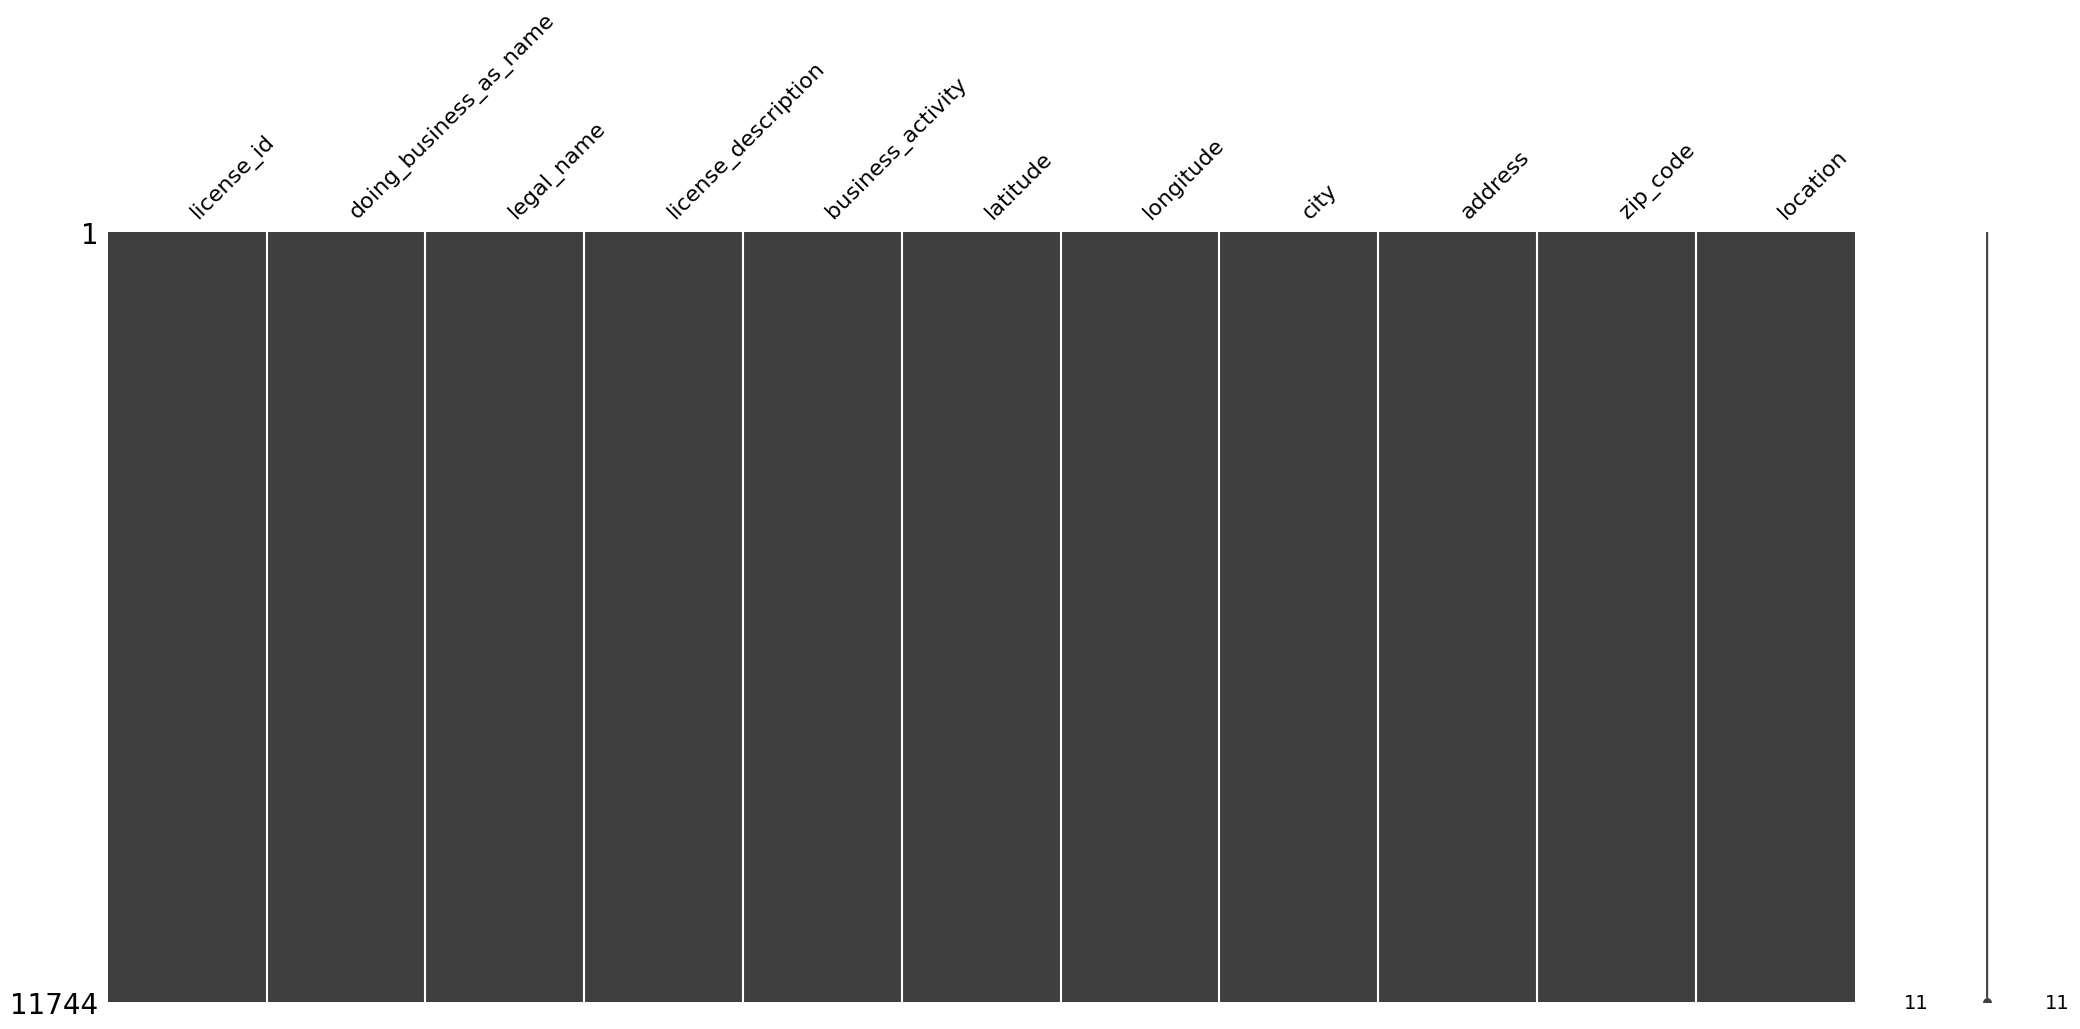

In [151]:
import missingno as msno
business_license.isnull().sum()                              # Count of nulls
msno.matrix(business_license_v3_food)                                # Visualize missing data
plt.show()


In [181]:
# Summary stats including object columns
business_license_v4_food.describe(include='all').T                 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
license_id,11744.0,NaN,NaN,NaN,2968368.729819,36812.329299,2245772.0,2937574.75,2967221.0,3000487.5,3036139.0
doing_business_as_name,11744,9731,SUBWAY,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
legal_name,11744,9254,STARBUCKS CORPORATION,125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
license_description,11744,8,Retail Food Establishment,10956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_activity,11744,253,Retail Sales of Perishable Foods,4029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,11744.0,NaN,NaN,NaN,41.882679,0.077737,41.64467,41.840945,41.891794,41.939163,42.020808
longitude,11744.0,NaN,NaN,NaN,-87.677823,0.05867,-87.906874,-87.708219,-87.667626,-87.636703,-87.525094
city,11744,3,CHICAGO,11742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,11744,10919,2300 S THROOP ST,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,11744,61,60608,493,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# from skimpy import skim
# skim(business_license_v2_food)

### Summary

In [182]:
from summarytools import dfSummary
dfSummary(business_license_v4_food)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,license_id[int64],Mean (sd) : 2968368.7 (36812.3)min < med < max:2245772.0 < 2967221.0 < 3036139.0IQR (CV) : 62912.8 (80.6),"11,744 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAbBJREFUeJzt3UGK2nAYxuF/OtOpnYUigpfoDTzEHLZH6MITeAN3gkhEO1I1KeneqTra6QvPszUfBvIjGMiHVdu2Bf53nz76BOAcj2cdBWeoquprKeWpXOdX27avpz4UKjeLdDQavfT7/eE18+v1elVV1fdTsQqVW3nqIp1MJq+DwWB3yWBd173pdDpcLpfd3Vio3F8X6Xg8/nnFaPez4SQPU0QQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEsGL09xq56nfNM3ncidC5SY7T/v9vnc8Hr/tdrsfpZRr3vB/k1B5985TZz6fD2ez2fPhcHgodyBUbrLztFqt3tx5ei8PU0QQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhL/+F2pVVb1Sypd/czp8oH7TNI91XXfX+2KbzebP3Ha77S0Wi+dLZs/5zt8VnVDOvVym2AAAAABJRU5ErkJggg=="">",0(0.0%)
2,doing_business_as_name[object],1. SUBWAY2. DUNKIN DONUTS3. CITGO4. SHELL5. BP6. 7-ELEVEN7. MCDONALD'S8. Dunkin Donuts9. MCDONALDS10. WHOLE FOODS MARKET11. other,"116 (1.0%)95 (0.8%)31 (0.3%)29 (0.2%)25 (0.2%)25 (0.2%)22 (0.2%)21 (0.2%)21 (0.2%)18 (0.2%)11,341 (96.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA7tJREFUeJzt3EFqU1EAhtH7SqjNJKUEugSddQFdhIvtIrqADt1DkWZgtJMnDypW0ImQL5CcM7DSgS+Dj9xU7t9pnucBhYvkKSA2SmIjIzYyYiMjNjJiIyM2MmIjM40x1mOMyzHG6zzP++7RnJvVdrv9vNlsbna73ddpmh4Ex6FcLKHd3d2N5evbOxwc7jPber3+cZh/Hn7zAwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsdHGtt/vP3SP5FxdLDd0n56exvJ1uRp+7BfE6bJBIDP5lVnU72zDuxrJumr5i2UVybrKsoqC/2cjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzehu6LIxdOCjXwskYvJDxmY3MxTRNn6ZpuuoeyTm/s30cY/j1CxycY5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjTS2L2OMH90jOVc2CGQco2TERkZsZKyryFhXkXGMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxjFKRmxkDF7IGLyQcYySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGMUpGbGQMXsgYvJBxjJIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZByjZMRGxrqKjHUVGccoGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHKNkxEbG4IWMwQsZxygZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2Qco2TERkZsZKyryFhXkXGMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxjFKRmxkDF7IGLyQcYySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGMUpmGmOsxxiX3SM5E6/zPO/ff2O13W4/bzabm+O9Jk7Rbrf7Ok3Tw/vgVkto9/f3++vr6+/HfXmcipeXl6vHx8eb5+fn5cT8HdvyxxLa7e3tt6O+Qk7N8vHsD35AICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7P6dSWkeySn7l89rZZLbsvdo79dCYH/tXS13NZ9/z3XwsmuhVtXkfEDAhmxkREbGbGRERsZsZERGxmxkREbo/ITKGyfSzOCbTIAAAAASUVORK5CYII="">",0(0.0%)
3,legal_name[object],"1. STARBUCKS CORPORATION2. FAMILY DOLLAR, LLC3. WALGREEN CO.4. COMPASS GROUP USA, INC.5. HOST INTERNATIONAL, INC.6. THE UNIVERSITY OF CHICAGO7. BOND DRUG COMPANY OF ILLINOIS,8. JEWEL FOOD STORES, INC.9. QUEST FOOD MANAGEMENT SERVICES10. POTBELLY SANDWICH WORKS, LLC11. other","125 (1.1%)69 (0.6%)64 (0.5%)61 (0.5%)49 (0.4%)48 (0.4%)46 (0.4%)43 (0.4%)41 (0.3%)41 (0.3%)11,157 (95.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA5tJREFUeJzt3EFOU1EAhtHbplE7aUNIWAYLYBEu1kWwAPZBDAysMqm5TY0TARPsZ1LOGYgjH4Mvr68v93ex3+8HFJbJVUBslMRGRmxkxEZGbGTERkZsZMRGZjHGWI8xPowxnvb7/a67NO/N6vLy8vNms7l4fHz8ulgsvgiOU1nO0K6vr8f8ebzDweme2dbr9Y/T/PPwmy8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGG9tut/vYXZL3ajlP6N7d3Y35cx4N/9+/EOfLBoHMwn+ZRX1nG+5qJOuq+RfLKpJ1lWUVBe/ZyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIrI5Dl8nYhZNyLJyMwQsZdzYyBi9kDF7IePVBRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMY+FkDF7IeGYj42OUjHUVGesqMp7ZyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRcSycjHUVGXc2MgYvZAxey

In [105]:
business_license_v2_food = business_license_v2[
    business_license_v2['license_description'].str.contains('food', case=False, na=False)
]
business_license_v2_food['license_description'].value_counts().reset_index().rename(columns={
    'index': 'license_description',
    'license_description': 'count'
}).head()

# pd.set_option('display.max_rows', None)    # Show all rows
# pd.set_option('display.max_colwidth', None)  # Prevent column value cutoff
# view

,count,count
0,Retail Food Establishment,33514
1,Wholesale Food Establishment,1199
2,Special Event Food,520
3,Mobile Food License,432
4,Food - Shared Kitchen - Supplemental,303


In [106]:
business_license_v2_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36042 entries, 0 to 161926
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   license_id              36042 non-null  int64  
 1   doing_business_as_name  36042 non-null  object 
 2   legal_name              36042 non-null  object 
 3   license_description     36042 non-null  object 
 4   business_activity       36039 non-null  object 
 5   latitude                36042 non-null  float64
 6   longitude               36042 non-null  float64
 7   city                    36042 non-null  object 
 8   state                   36042 non-null  object 
 9   address                 36042 non-null  object 
 10  zip_code                36009 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.3+ MB


### License_types categorization

In [168]:
view = business_license_v3_food['license_description'].value_counts(dropna=False).reset_index().rename(columns={
    'index': 'business_activity',
    'license_description': 'license_description'
})
view

,license_description,count
0,Retail Food Establishment,10956
1,Wholesale Food Establishment,388
2,Special Event Food,140
3,Mobile Food License,137
4,Food - Shared Kitchen - Supplemental,99
5,Food - Shared Kitchen,21
6,Retail Food - Seasonal Lakefront Food Establishment,2
7,Pop-Up Food Est. User - Tier I,1


In [169]:
def categorize_food_place(row):
    desc = str(row['license_description']).lower()
    name = str(row['doing_business_as_name']).lower()
    activity = str(row.get('business_activity', '')).lower()

    # Direct license-based categorization
    if 'mobile food' in desc:
        return 'food_truck'
    elif 'shared kitchen' in desc:
        return 'shared_kitchen'
    elif 'wholesale' in desc:
        return 'wholesale'
    elif 'special event' in desc:
        return 'event_food'
    elif 'pop-up' in desc:
        return 'pop_up'
    elif 'seasonal lakefront' in desc:
        return 'lakefront'

    # Name-based categorization for Retail Food
    fast_food_keywords = ['mcdonald', 'burger king', 'kfc', 'wendy', 'popeyes', 'subway', 'chipotle', 'taco bell', 'pizza hut', 'dunkin','shake shack', 'jack in the box']
    fine_dining_keywords = ['steakhouse', 'grill', 'bistro', 'chophouse', 'prime', 'fine dining']
    cafe_keywords = ['coffee', 'cafe', 'espresso', 'tea']
    bar_keywords = ['bar', 'pub', 'tavern', 'lounge']

    if any(kw in name for kw in fast_food_keywords):
        return 'fast_food'
    elif any(kw in name for kw in fine_dining_keywords):
        return 'fine_dining'
    elif any(kw in name for kw in cafe_keywords):
        return 'cafe'
    elif any(kw in name for kw in bar_keywords):
        return 'bar'
    else:
        return 'restaurant'  # fallback for Retail Food


In [188]:
def categorize_food_place(row):
    desc = str(row['license_description']).lower()
    name_dba = str(row.get('doing_business_as_name', '')).lower()
    name_legal = str(row.get('legal_name', '')).lower()
    activity = str(row.get('business_activity', '')).lower()

    # Direct license-based categorization
    if 'mobile food' in desc:
        return 'food_truck'
    elif 'shared kitchen' in desc:
        return 'shared_kitchen'
    elif 'wholesale' in desc:
        return 'wholesale'
    elif 'special event' in desc:
        return 'event_food'
    elif 'pop-up' in desc:
        return 'pop_up'
    elif 'seasonal lakefront' in desc:
        return 'lakefront'

    # Business activity-based categorization
    if 'retail sales of general merchandise' in activity:
        return 'convenience_store'
    elif 'administrative commercial office' in activity:
        return 'office_cafeteria'

    # Combined name-based categorization
    full_name = f"{name_dba} {name_legal}"

    fast_food_keywords = [
        'raising cane', '7-eleven', 'pizza hut', 'wingstop', 'jimmy johns', 'dunkin',
        'potbelly', 'chick-fil-a', 'dominos', 'mcdonald', 'kentucky', 'kfc',
        'shake shack', 'burger king', 'taco bell', 'subway', 'wendy', 'popeyes'
    ]
    fine_dining_keywords = ['steakhouse', 'grill', 'bistro', 'chophouse', 'prime', 'fine dining']
    cafe_keywords = ['coffee', 'cafe', 'espresso', 'tea']
    bar_keywords = ['bar', 'pub', 'tavern', 'lounge']

    if any(kw in full_name for kw in fast_food_keywords):
        return 'fast_food'
    elif any(kw in full_name for kw in fine_dining_keywords):
        return 'fine_dining'
    elif any(kw in full_name for kw in cafe_keywords):
        return 'cafe'
    elif any(kw in full_name for kw in bar_keywords):
        return 'bar'
    else:
        return 'restaurant'  # fallback


In [191]:
restaurants = business_license_v3_food.copy()
restaurants['food_category'] = business_license_v3_food.apply(categorize_food_place, axis=1)
restaurants.head()

,license_id,doing_business_as_name,legal_name,license_description,business_activity,latitude,longitude,city,address,zip_code,location,food_category
0,3025375,LAO PENG YOU,LAO PENG YOU LLC,Special Event Food,180 Day Multiple Events - Special Event Food,41.896005,-87.677938,CHICAGO,2020 W CHICAGO AVE,60622,"{""type"": ""Point"", ""coordinates"": [-87.6779378973854, 41.896004699879654]}",event_food
7,3025642,CHILLS ITALIAN ICE,LEMONCHILLO LLC,Special Event Food,180 Day Multiple Events - Special Event Food,41.903060,-87.678437,CHICAGO,2029 W DIVISION ST 1,60622,"{""type"": ""Point"", ""coordinates"": [-87.67843725836676, 41.903059772046284]}",event_food
8,3020896,TACO PROS/EGG HOLIC,1400 LAKE PARK INC.,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,41.809795,-87.592374,CHICAGO,1400 E 47TH DR E,60653,"{""type"": ""Point"", ""coordinates"": [-87.59237386663331, 41.80979548271692]}",restaurant
9,3020976,SAM 95 FOOD INC.,SAM 95 FOOD INC.,Retail Food Establishment,Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods,41.721357,-87.659962,CHICAGO,1452 W 95TH ST 1ST,60643,"{""type"": ""Point"", ""coordinates"": [-87.65996168027644, 41.72135685967372]}",convenience_store
18,3020057,STALWART MARKET,STALWART MARKET LLC,Mobile Food License,Sales of Produce From a Produce Stand Located on an Urban Farm (Produce Merchant),41.732108,-87.543374,CHICAGO,3320-3322 E 90TH ST,60617,"{""type"": ""Point"", ""coordinates"": [-87.5433735775229, 41.73210827910671]}",food_truck


In [192]:
restaurants['food_category'].value_counts()


food_category
restaurant           7190
convenience_store    1440
fast_food             765
cafe                  739
bar                   459
wholesale             388
fine_dining           355
event_food            140
food_truck            137
shared_kitchen        120
office_cafeteria        8
lakefront               2
pop_up                  1
Name: count, dtype: int64

#### Fast food check

In [193]:
fast_food_df = restaurants[restaurants['food_category']=='fast_food']
fast_food_df.head()

,license_id,doing_business_as_name,legal_name,license_description,business_activity,latitude,longitude,city,address,zip_code,location,food_category
77,3014102,"JUBILEE COFFEE, INC. / DBA DUNKIN' DONUTS","JUBILEE COFFEE, INC.",Retail Food Establishment,Sale of Food Prepared Onsite With Dining Area,41.997598,-87.808253,CHICAGO,7240 W DEVON AVE,60631,"{""type"": ""Point"", ""coordinates"": [-87.80825275768383, 41.99759825874489]}",fast_food
187,3012775,Dunkin Donuts Baskin Robbins,DIVERSEY DBT INC.,Retail Food Establishment,Preparation and Sale of Coffee and/or Drinks,41.931757,-87.649125,CHICAGO,2706 N HALSTED ST,60614,"{""type"": ""Point"", ""coordinates"": [-87.64912468818162, 41.931757070122984]}",fast_food
278,3009271,Burger King #142,TRI CITY FOODS OF ILLINOIS LLC,Retail Food Establishment,Sale of Food Prepared Onsite With Dining Area,41.794274,-87.723043,CHICAGO,5425 S PULASKI RD,60632,"{""type"": ""Point"", ""coordinates"": [-87.72304339449933, 41.79427426174653]}",fast_food
287,3009245,BURGER KING #1512,TRI CITY FOODS OF ILLINOIS LLC,Retail Food Establishment,Preparation of Food and Dining on Premises With Seating,41.895863,-87.686192,CHICAGO,2344 W CHICAGO AVE,60622,"{""type"": ""Point"", ""coordinates"": [-87.68619201224591, 41.895863316453]}",fast_food
300,3009272,Burger King #1338,TRI CITY FOODS OF ILLINOIS LLC,Retail Food Establishment,Sale of Food Prepared Onsite With Dining Area,41.692733,-87.701014,CHICAGO,11020 S KEDZIE AVE,60655,"{""type"": ""Point"", ""coordinates"": [-87.70101405389028, 41.692732531294446]}",fast_food


In [175]:
dfSummary(fast_food_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,license_id[int64],Mean (sd) : 2971449.4 (37667.9)min < med < max:2868083.0 < 2969579.5 < 3033583.0IQR (CV) : 72100.5 (78.9),410 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmpJREFUeJzt3MGK2kAcx/GZml1SBUUEvfkChT149CH6sL321oNP4Bt4EyQqphsSY5YU2kOxWyfGZn7T7+fsqLBfwuS/Y2xVVQbw3YeuvwBwi+imV+G/YK39aIx5vuMt8qqqXs0DECp+RTqZTD4Ph8Oxaeh4PCbW2i+PiJVQ8dNzHelyuXwdjUaZcXQ4HOLVajXe7Xb1FZlQ8Vh1pNPp9HvD5fXW4SG4mYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEYH8u7fNTP+AuyFB9f+oH3AUZqu9P/YC7UEP1+qkfcBd0qKL7Y/bGVxCqZ/tj9sbXEapH+2P2xn9GqP7tj9kbX8HAHxIIFRIIFRIIFRK4mfJMWZZPxpihtbbpW+QhjrYItf1ghpfLpV7rLE3Tp6IoXubzea/X6zn/6zfkOSyhthxMURRxWZafsiz7ZoxxGk/leR7FcdxfLBbZbDZLXL/3IeA5LKG2HMxmsxmv1+v++XzuNf38wWDAGYXfEGrLwSRJEmQoXeOuHxK4osKXicW70wpCRSvunVj8bVpBqIEpOxir3XsDesu0glADknY0VmtpYvHuTWgU6En5u64OqvKOx2qPFIV4Ur6tq4OqQYBjtSjEk/K+Xx0QVqiNT8r7fnWAOwb+kECokECokECokECokECokECokECokECokECokECokECokECokECoCOOYH8+jh/eh3vs8+v1+f7LWfjXGZA1/ThLVP/xyXXg6nX6sSdM03m63/X+5vqu1Rvizb/kbvwFP7XHT9rESIAAAAABJRU5ErkJggg=="">",0(0.0%)
2,doing_business_as_name[object],"1. SUBWAY2. MCDONALD'S3. MCDONALDS4. Taco Bell5. WENDY'S PROPERTIES, LLC6. CHIPOTLE MEXICAN GRILL7. McDONALD'S8. KFC9. TACO BELL10. Chipotle Mexican Grill11. other",116 (28.3%)22 (5.4%)21 (5.1%)16 (3.9%)15 (3.7%)13 (3.2%)12 (2.9%)7 (1.7%)7 (1.7%)7 (1.7%)174 (42.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA8xJREFUeJzt3cFqE1EAhtEbCaKbllLIw/QhfFgfom8TpF204iZyoUUX3RQy32TIOaDgyggfN8xwf7s7nU4DCl+SvwXERklsZMRGRmxkxEZGbGTERkZsZHZjjO9jjK9jO/6cTqfXtT8En7e/v7//cXNzczc24vn5+ddut/spuO3Zz9AeHh5eb29vf48L9/T09O3x8fHueDzOk1hsG7Ofv83QDofDy9iG+bXPBnlAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM22itG857Y2ICtfE4+tp83X+eFxK3cE5ufd14NX/tz8Hk2CGR2/sssLulkc5LQrKusmUjWVdZM1OuqTTylcvm81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYuMyBi8GJqSDFwMTzsW1cDIGL2ScbGQMXsgYvJAxeCHjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kXAsnY/BCxgMCF/E16uuTZl1lVUWyrrKqol5XWVVxVh4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYWHddZVVFuq6yquLcXAsnY11FxslGxuCFjMELGYMXMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsa1cDIGL6x+sjnVaAYvxi4kgxdjF+rBi7ELZ+elLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxsd66yrKKdF1lWcUSbBDIWFeRcbKRsa4iY11FxrqKjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBC6udbE40msGLoQtL+vI+eJm/3qL76MdBwvkGL29/NnRhMV7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxsd7gBYrBi6ELi3ItnIzBCxkPCGR8jZKxriJjXUXGuoqMBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIuBZOxrqKjJONjMELGYMXMgYvZLzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXljtZLtmTvVy8HLNjH2Wt38fvPy3Q7g682l8PiQdj8d5wott6cHL4XB4GdfN2GdhXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXjx719l8HLVV2yMfZbnWvg/roUvzOCFjAcEMmIjIzYyYiMjNjJiIyM2MmIjIzZG5S/diCnFyERsqQAAAABJRU5ErkJggg=="">",0(0.0%)
3,legal_name[object],"1. CHIPOTLE MEXICAN GRILL, INC.2. TRI CITY FOODS OF ILLINOIS LLC3. WENDY'S PROPERTIES, LLC4. AG BELLS II LLC5. PEPINO/ROBLES LTD.6. FAZAL DEVELOPMENT NETWORK INC7. MCDONALD'S RESTAURANTS OF ILLI8. RMS MANGEMENT, INC.9. OMAKIN RESTAURANTS LLC10. BUENA VIDA, LLC11. other",34 (8.3%)32 (7.8%)21 (5.1%)18 (4.4%)10 (2.4%)8 (2.0%)7 (1.7%)7 (1.7%)7 (1.7%)6 (1.5%)260 (63.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAABBdJREFUeJzt3VFqE2EARtFJCWpeWqSQZXQBXYSLdRFdQPcRJHkw2pfIiEJ9kUQ7d0JyDigIDS1ymZDh/zqLw+EwQOEm+S4gNkpiIyM2MmIjIzYyYiMjNjJiI7MYhmE1DMO7E1/3cjgc9hP9TFyo5f39/afb29uPp7xot9t9WSwWnwXHKZZjaI+Pj/u7u7tvx7xgu91+eHp6+rjZbMarodg42nL8awxtvV5/Pf5lP9964SQ+IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRE

In [194]:
fast_food_df_sorted = fast_food_df.sort_values(by='doing_business_as_name', ascending=False)
fast_food_df_sorted.head()


,license_id,doing_business_as_name,legal_name,license_description,business_activity,latitude,longitude,city,address,zip_code,location,food_category
35482,2931985,subway,Niki & Japi Inc DBA Subway,Retail Food Establishment,Retail Sales of Perishable Foods,41.908178,-87.746215,CHICAGO,1510 N CICERO AVE 1ST,60651,"{""type"": ""Point"", ""coordinates"": [-87.74621519474273, 41.90817759983461]}",fast_food
138228,2994926,subway,"RADHA FOODS, INC.",Retail Food Establishment,Retail Sales of Perishable Foods,41.772725,-87.586442,CHICAGO,6718 S STONY ISLAND AVE 1ST,60649,"{""type"": ""Point"", ""coordinates"": [-87.58644243639392, 41.77272515346843]}",fast_food
147861,2961813,subway,herndz food II corporation,Retail Food Establishment,Sale of Food Prepared Onsite With Dining Area | Preparation and Sale of Coffee and/or Drinks,41.877815,-87.642677,CHICAGO,304 S JEFFERSON ST A,60661,"{""type"": ""Point"", ""coordinates"": [-87.64267682739994, 41.87781496811959]}",fast_food
40320,2991117,Wingstop,"S & L Wings, LLC",Retail Food Establishment,Preparation of Food and Dining on Premises With Seating,41.936235,-87.766564,CHICAGO,3046 N CENTRAL AVE,60634,"{""type"": ""Point"", ""coordinates"": [-87.76656405018639, 41.93623461145712]}",fast_food
32779,2922445,Wingstop,CWK 79th LLC,Retail Food Establishment,Preparation of Food and Dining on Premises With Seating,41.748036,-87.741157,CHICAGO,7953 S CICERO AVE D54,60652,"{""type"": ""Point"", ""coordinates"": [-87.74115697298679, 41.74803596790578]}",fast_food


### other restaurants check

In [199]:
# other_df = restaurants[restaurants['food_category']=='restaurant']
other_df = restaurants[restaurants['food_category']=='convenience_store']
other_df.head()

,license_id,doing_business_as_name,legal_name,license_description,business_activity,latitude,longitude,city,address,zip_code,location,food_category
9,3020976,SAM 95 FOOD INC.,SAM 95 FOOD INC.,Retail Food Establishment,Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods,41.721357,-87.659962,CHICAGO,1452 W 95TH ST 1ST,60643,"{""type"": ""Point"", ""coordinates"": [-87.65996168027644, 41.72135685967372]}",convenience_store
33,3020522,WHOLE SALE MARKET,WHOLE SALE MARKET INCORPORATED,Retail Food Establishment,Retail Sales of Fresh Fruits and Vegetables (Leafy and Non Leafy Vegetables) | Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods | Retail Sales of General Merchandise,41.778800,-87.605748,CHICAGO,6355 S COTTAGE GROVE AVE,60637,"{""type"": ""Point"", ""coordinates"": [-87.60574800239888, 41.77879981236933]}",convenience_store
117,3014069,REGENTS MARKET,SHUBHAM CORPORATION,Retail Food Establishment,Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods,41.802630,-87.584472,CHICAGO,1644 E HYDE PARK BLVD 1,60615,"{""type"": ""Point"", ""coordinates"": [-87.58447171338366, 41.802630048269855]}",convenience_store
125,3014295,All Day Kitchens,"VRAIS FOODS, LLC",Retail Food Establishment,Retail Sales of General Merchandise and Non-Perishable Food | Sale of Food Prepared Onsite Without Dining Area | Preparation and Sale of Coffee and/or Drinks,41.897956,-87.676964,CHICAGO,907 N DAMEN AVE 101,60622,"{""type"": ""Point"", ""coordinates"": [-87.67696390590685, 41.89795569189251]}",convenience_store
175,3014868,TWINSPOT,TWINSPOT INC.,Retail Food Establishment,"Preparation of Food, Coffee or Drinks | Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods",41.780162,-87.613805,CHICAGO,447 E 63RD ST 1ST,60637,"{""type"": ""Point"", ""coordinates"": [-87.61380513050851, 41.78016157649594]}",convenience_store


In [200]:
dfSummary(other_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,license_id[int64],Mean (sd) : 2968274.1 (35704.2)min < med < max:2836066.0 < 2966893.0 < 3035375.0IQR (CV) : 59818.2 (83.1),"1,440 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmNJREFUeJzt3b9u2kAAx/G7mtALVLYACTZeIFIHRvaufdg+QgeGzrwBGwJZIEgsjHFlqe1YiF2X+x3fz8yfRP4qd86dzrYsSwP47sO9fwDgFp2bXoWHYK19NsZ0G3zEqSzLN9MCQsWfSEej0dc4jgempv1+n1prv7URK6Hit24V6Xw+f0uSJDPvtNvt3GKxGGy32+ovMqE+wBDa2vB5iyrS8Xj8auqpfu9WEKpnQ2ibw6cyQvVoCG17+FRGqP4Noc93mnbEl8vlyXiKUAO64LbBtCPPc1cUxUuWZd+NMXXnqK0h1LAueLfutGO1Wg2Wy2XvfD5HxkOEGuAFT2pMO9I0be2O/V8g1Ae74KpY64cEQoUEQoUEQoUEQoUEQoUEQoUE/o/qmaIoquXX2FprQluvb4JQPXI8Hp/yPP88nU6jKIqy0NbrmyBUj5xOp45zrjebzbLJZJK+9/0rD5Zv20KoHur3+7W2CKYBL99yMwUJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJhAoJbEqBL3tp/3rcJqHCi720147bJFTcfS/tLcdtEiq82Et77bhNbqYggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhIdgl1IYPzg32VDxVQYba9MG5IZ+KpyrIUJs+ez7kU/FUhRpqowfnhnwqnipupiCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGhE+gufXboP1qo1lpnjPlo/j83HA6/JEnyqe4O/c1m86POFx8OB/frzE+3Xq97Cu81wt9dHTt57UU/AWueMsi+0j6TAAAAAElFTkSuQmCC"">",0(0.0%)
2,doing_business_as_name[object],1. BP2. HUDSON NEWS3. CITGO4. Circle K5. SHELL6. SAVE A LOT7. WHOLE FOODS MARKET8. AMAZON GO9. MOBIL10. FALCON FUEL11. other,"14 (1.0%)12 (0.8%)12 (0.8%)9 (0.6%)7 (0.5%)6 (0.4%)6 (0.4%)4 (0.3%)4 (0.3%)4 (0.3%)1,362 (94.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA8JJREFUeJzt3EFKG2EAhuF/JKjZRCTgEdqdB/AQHtZDeACXvYOIWTTVzZQBSzcNduMrxOdZ1ILQyeJlJgn/12me5wGFk+QqIDZKYiMjNjJiIyM2MmIjIzYyYiMzjTHWY4zTMcbrPM/77tJ8Navtdnu72Wwud7vd0zRNd4Ljo5wsoV1fX4/l59sdDj7uPdt6vX75mH8e/vIBgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYaGPb7/dn3SX5qk6WE7oPDw9j+bkcDf/sF8TxskEgM/kvs6jvbMNdjWRdtfzFsopkXWVZRcH3bGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZFZvQ5eFsQsfyrFwMgYvZNzZyBi8kDF4IeOrDzJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZBwLJ2PwQsZ7NjIeo2Ssq8hYV5Hxno2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnHwslYV5FxZyNj8ELG4IWMrz7IiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJBxLJyMwQsZdzYyBi9kDF7I+OqDjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxQSBjXUXGnY2MdRUZ6yoyvvogIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELGsXAyBi9kvGcjczJN0/dpms67S/KV72zfxhhnn/1COH4eo2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZspLH9GGO8dJfkq7JBIOMxSkZsZMRGxrqKjHUVGY9RMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIeIySERsZgxcyBi9kPEbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjMUpmGmOsxxin3SU5Yq/zPO8P/XK13W5vN5vNZfuaOEa73e5pmqa7Q8GtltBubm72FxcXv/qXx7F4fn4+v7+/v3x8fFyekv+ObfljCe3q6upn/go5NstbsoN8QCAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOz+nM8pLskx+h/GlotB96Wc0jvHQ+B9ywtLad1D/3esXCyY+HWVWR8QCAjNjJiIyM2MmIjIzYyYiMjNjJiY1R+A8UP8EXEZnuJAAAAAElFTkSuQmCC"">",0(0.0%)
3,legal_name[object],"1. FAMILY DOLLAR, LLC2. HUDSON NEWS O'HARE JOINT VENTU3. DG RETAIL, LLC4. TARGET CORPORATION5. RDK VENTURES LLC6. YELLOW BANANA ILLINOIS LLC7. WALGREEN CO.8. WHOLE FOODS MARKET GROUP, INC.9. AMAZON RETAIL LLC10. HIGHLAND PARK CVS, L.L.C.11. other","21 (1.5%)17 (1.2%)15 (1.0%)13 (0.9%)13 (0.9%)8 (0.6%)8 (0.6%)6 (0.4%)5 (0.3%)5 (0.3%)1,329 (92.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA51JREFUeJzt3EFuUlEAhtFLQ1QmbRqSLoMFsAgX6yK6gO6DmDIQ7QRza43T0oTPBM4ZWEfSwZf3Hi/3d3E8HgcUbpJPAbFREhsZsZERGxmxkREbGbGRERuZxRhjNcb4NMZ4OR6Ph+6juTbL9Xr99fb29n6/339fLBbfBMe53MzQNpvNmD/frnBwvme21Wr16zz/PPzjCwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsdHGdjgcPncfybW6mSd0n56exvw5j4b/71+Iy2WDQGbhv8yi4spGxrqKjHUVGesqMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsa

In [196]:
type_view = restaurants.groupby(['license_description', 'food_category']).size().reset_index(name='count')
type_view.head()

,license_description,food_category,count
0,Food - Shared Kitchen,shared_kitchen,21
1,Food - Shared Kitchen - Supplemental,shared_kitchen,99
2,Mobile Food License,food_truck,137
3,Pop-Up Food Est. User - Tier I,pop_up,1
4,Retail Food - Seasonal Lakefront Food Establishment,lakefront,2


### Checks for missing values

In [135]:
# Check for missing values for location
no_location = business_license_v3_food[business_license_v3_food['location'].isna()]
# no_location

no_location.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 3707 to 153095
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   license_id              96 non-null     int64  
 1   doing_business_as_name  96 non-null     object 
 2   legal_name              96 non-null     object 
 3   license_description     96 non-null     object 
 4   business_activity       96 non-null     object 
 5   latitude                96 non-null     float64
 6   longitude               96 non-null     float64
 7   city                    96 non-null     object 
 8   state                   96 non-null     object 
 9   address                 96 non-null     object 
 10  zip_code                95 non-null     object 
 11  location                0 non-null      object 
dtypes: float64(2), int64(1), object(9)
memory usage: 9.8+ KB


In [143]:
# Check for missing values for location
no_zip_code = business_license_v3_food[business_license_v3_food['zip_code'].isna()]
no_zip_code

# no_zip_code.info()

,license_id,doing_business_as_name,legal_name,license_description,business_activity,latitude,longitude,city,state,address,zip_code,location
15905,2966309,TAQUERIA MI PUEBLO III INC.,TAQUERIA MI PUEBLO III INC.,Retail Food Establishment,Preparation of Food and Dining on Premises With Seating,41.801005,-87.686616,CHICAGO,IL,2459 W 51ST ST 1,NaN,"{""type"": ""Point"", ""coordinates"": [-87.68661612013953, 41.80100543752876]}"
16866,2970835,MANRRAS GROCERY,"MANRRAS GROCERY, INC.",Retail Food Establishment,Retail Sales of Fresh Fruits and Vegetables (Leafy and Non Leafy Vegetables) | Retail Sales of General Merchandise and Non-Perishable Food,41.846461,-87.703804,CHICAGO,IL,3132 W 25TH ST,NaN,"{""type"": ""Point"", ""coordinates"": [-87.7038037640727, 41.846460663996105]}"
17967,2943276,MCDONALD'S,CAGUAX LTD.,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,42.008970,-87.906897,CHICAGO,IL,11600 W TOUHY AVE T-3 H&K,NaN,"{""type"": ""Point"", ""coordinates"": [-87.90689745006604, 42.008969609166535]}"
31596,2958652,Fulton Market - Chicago,"FULTON TROIKA, LLC",Wholesale Food Establishment,Direct Food Sales to Businesses | Enagage in Wholesale Food Sales,41.816068,-87.736017,CHICAGO,IL,4501 W ANN LURIE PL 1ST,NaN,"{""type"": ""Point"", ""coordinates"": [-87.73601666681014, 41.816068222595995]}"
122281,2984211,Home Run Inn Pizza T2E Conc. Site NO. 104,"HOST INTERNATIONAL, INC.",Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,42.008751,-87.906874,CHICAGO,IL,11601 W TOUHY AVE T2 E CON,NaN,"{""type"": ""Point"", ""coordinates"": [-87.90687413400109, 42.00875076599798]}"
122337,2984212,"Carry Out, Carry On","HOST INTERNATIONAL, INC.",Retail Food Establishment,Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods,42.008751,-87.906874,CHICAGO,IL,11601 W TOUHY AVE T2 E CON,NaN,"{""type"": ""Point"", ""coordinates"": [-87.90687413400109, 42.00875076599798]}"
122385,2965608,AUNTIE ANNE'S PRETZELS,FRESH DINING CONCEPTS LLC,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,42.008751,-87.906874,CHICAGO,IL,11601 W TOUHY AVE 2EF,NaN,"{""type"": ""Point"", ""coordinates"": [-87.90687413400109, 42.00875076599798]}"
122429,2950430,Green Market L6,"O'HARE POPCORN & FOODS, L.L.C.",Retail Food Establishment,Retail Sales of General Merchandise and Non-Perishable Food | Retail Sales of Perishable Foods,42.008751,-87.906874,CHICAGO,IL,11601 W TOUHY AVE TERMINAL 3 L6,NaN,"{""type"": ""Point"", ""coordinates"": [-87.90687413400109, 42.00875076599798]}"
122649,2916095,HALE MCDONALD'S,"INFINITE BUENA VIDA, LLC",Retail Food Establishment,Sale of Food Prepared Onsite With Dining Area,42.008751,-87.906874,CHICAGO,IL,11601 W TOUHY AVE TERMINAL 5,NaN,"{""type"": ""Point"", ""coordinates"": [-87.90687413400109, 42.00875076599798]}"
122947,2965607,AUNTIE ANNE'S PRETZELS,FRESH DINING CONCEPTS LLC,Retail Food Establishment,Sale of Food Prepared Onsite Without Dining Area,42.008751,-87.906874,CHICAGO,IL,11601 W TOUHY AVE 1C,NaN,"{""type"": ""Point"", ""coordinates"": [-87.90687413400109, 42.00875076599798]}"


# 2.2 Population counts

### Exploration
- no duplicates
- remove 1st row as it a city wide (probably used to calculate percentages)
- keep 2021 as it is the latest year (transformation will be needed if want to calculate the YoY increase in population, also not a good year to use as it is during covid)
- zipcode is cast as geography type, to keep in mind when joining with other tables later on
- remove rows: geography type, record_id
- keep population_other with NaN, keep in mind if using for model


In [7]:
population_counts.head()

,geography_type,year,zip_code,population_total,population_0_to_17,population_18_to_29,population_30_to_39,population_40_to_49,population_50_to_59,population_60_to_69,population_70_to_79,population_80,population_female,population_male,population_latinx,population_asian,population_black,population_white,population_other,record_id
0,Citywide,2018,Chicago,2705988,548999,552935,456321,336457,312965,262991,155334,79986,1386113,1319875,776661,179841.0,784266.0,899980,119467.0,Citywide-Chicago-2018
1,ZIP Code,2018,60601,14675,820,4606,2792,2190,1333,1340,1272,322,7484,7191,1274,NaN,NaN,9677,NaN,ZIP_Code-60601-2018
2,ZIP Code,2018,60602,1244,149,435,462,135,53,10,0,0,551,693,81,NaN,NaN,788,NaN,ZIP_Code-60602-2018
3,ZIP Code,2018,60603,1174,56,561,101,97,197,97,65,0,601,573,115,NaN,NaN,707,NaN,ZIP_Code-60603-2018
4,ZIP Code,2018,60604,782,38,303,104,51,101,130,50,5,413,369,34,NaN,NaN,479,NaN,ZIP_Code-60604-2018


In [6]:
from summarytools import dfSummary
dfSummary(population_counts)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,geography_type[object],1. ZIP Code2. Citywide,231 (98.3%)4 (1.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAThJREFUeJzt20Fqg0AYQOExSGk3ShA8jIfoYXsIbyNBF7V0M+UvSTBZmyfo+yBgsplZPIwJ8xc55yQRipTSR0rpDVlNR/Sbc57jomya5rOqqvPWO9I+TdN0KYriK4IrI7Su6+a6rn+23pj2ZRzH977vz8MwxDfnXMaHEVrbtt9bb067FI9p/07b7kNHYmzCGJswxiaMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJsw5e2QG7ekjuK5qzKO7cZpyuUhN2kt0VfMIcS1Ay/CBl4KR/lEeb6z3SuU1vYwyrccu1p9JR3e6TbKF69rdD6/6SXuo3zX9/4i1cv4p64wxiaMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQnjKJ8wy1G+h7EraW0OvChR/gCmel6ARxJszwAAAABJRU5ErkJggg=="">",0(0.0%)
2,year[int64],1. 20182. 20193. 20214. 2020,60 (25.5%)60 (25.5%)60 (25.5%)55 (23.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAaxJREFUeJzt20GKGkEAhtHqICHZKIPgYTxEDptDeBsJusiEbDr0FSJ8U6PvLdzai4+WkvqXdV0HFL4k3wJio7SMMb6PMb6Oef1d1/X9ox+Cx+2Ox+OP/X7/NiZ1v99/LcvyU3Cf324L7Xw+vx8Ohz9jMrfb7dvlcnm7Xq/bm1dsn9xu+9hCO51Ov8ectp95noADAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG+2tj+0qz5jQrM/F/9ltlxO3O2OzXuXZnm+7rfvRz8HjXAsns5jyUXFAIONnlIx1FRnrKjLWVWQcEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYwpHxlTPjI2CGRM+ch4s5GxriJjXUXGuoqMP3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyNghkrKt46TebN9mTmm5dZU31vKZaV1lTPbcZ11VTnop5nD91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiN11xXzfIcvMi6yprqedkgkLGuIuOAwKj8Ayec2Ln5nsudAAAAAElFTkSuQmCC"">",0(0.0%)
3,zip_code[object],1. Chicago2. 606013. 606334. 606345. 606366. 606377. 606388. 606399. 6064010. 6064111. other,4 (1.7%)4 (1.7%)4 (1.7%)4 (1.7%)4 (1.7%)4 (1.7%)4 (1.7%)4 (1.7%)4 (1.7%)4 (1.7%)195 (83.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA39JREFUeJzt3EFq21AARVEpmJJObIrBi/EiutguwrsxRR40JROVD05J5/VNqc6BBDxyoRcJif8yr+s6QeEp+RYQGyWxkREbGbGRERsZsZERGxmxkZmnafo8TdOn++fXdV1fuq9nS3bH4/Hrfr//Mj7cbrfv8zx/ExyP8DRCO5/PL+PnHt3bVQ7+qt34dTgcft4/j1sqPIQHBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJioz1itCzLc/eVbNVunM69XC6/T+qOo+Ef/Y/i/2SDQGb2J7OouLKRsa4iY11FxrqKjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxlXNjIGL2QMXsgYvJDxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh4wGBjNsoGesqMtZVZKyryHhAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxj4WSsq8i4spExeCFj8ELG4IWMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGVc2MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuImODQMa6iowrGxnrKjLWVWSsq8h4qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZx8LJGLyQcWUjY/BCxuCFjMELGS91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzIeEMi4jZKxriJjXUXGuoqMBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOBZOxrqKjCsbGYMXMgYvZAxeyHipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvPBhVza26bW4o/0xeGGbbtHQafc2eHm3Q2BDlmV5Hg+I1+t13N0eG9v4NUI7nU4/HvlF/NOSoZOXumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXjZuCf/v3w9e/D3djbpFQyfHwsmOhRu8kPGAQEZsZMRGRmxkxEZGbGTERkZsZMTGVPkFxAbTHbmMviIAAAAASUVORK5CYII="">",0(0.0%)
4,population_total[int64],Mean (sd) : 91792.9 (344775.7)min < med < max:0.0 < 46591.0 < 2705988.0IQR (CV) : 40016.5 (0.3),230 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAXhJREFUeJzt10FqwkAYhuGZUsRCSaiCh3HfbQ/bQ3gbKcmiFkGm5AClGhH7ledZ55/M4mUmqa21An/dw703AOd4/O2BWutTKWVR5jm21g4zZ+G8UKdI1+v1W9d1L2WGcRw/aq3vYuXWJ+piinS73R76vv+6ZOFhGJa73e5lv99Pp7FQue3VP5ki3Ww2nzPWnz4b4Gp+poggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUI

## Cleaning & transformation
- remove col: geography type, record_id
- remove 1st row as it a city wide (probably used to calculate percentages)
- keep 2021 as it is the latest year (transformation will be needed if want to calculate the YoY increase in population, also not a good year to use as it is during covid)
- Cast population_asian,population_black, population_other to int64

In [ ]:
# Code for script
population_counts_v2 = population_counts.drop(['geography_type','record_id'],axis=1)
population_counts_v2 = population_counts_v2[population_counts['zip_code'] != 'Chicago']
population_counts_v3 = population_counts_v2[population_counts_v2['year']==2021]

In [15]:
population_counts.tail()

,geography_type,year,zip_code,population_total,population_0_to_17,population_18_to_29,population_30_to_39,population_40_to_49,population_50_to_59,population_60_to_69,population_70_to_79,population_80,population_female,population_male,population_latinx,population_asian,population_black,population_white,population_other,record_id
230,ZIP Code,2021,60626,50295,8007,11937,8965,6995,6738,4360,2178,1115,25318,24977,9694,2724.0,12646.0,23029,2202.0,ZIP_CODE-60626-2021
231,ZIP Code,2021,60628,64489,13734,11638,7491,7593,9066,6930,4860,3177,34961,29528,2775,79.0,59168.0,1462,1005.0,ZIP_CODE-60628-2021
232,ZIP Code,2021,60629,107487,29283,20690,13227,14954,11096,8187,7688,2362,53753,53734,79111,595.0,18878.0,7650,1253.0,ZIP_CODE-60629-2021
233,ZIP Code,2021,60630,55591,11093,7053,8926,7337,7479,7975,3605,2123,27787,27804,14180,7122.0,1007.0,31325,1957.0,ZIP_CODE-60630-2021
234,ZIP Code,2021,60631,30589,6925,3308,4357,3813,4657,3686,1846,1997,15516,15073,4491,1262.0,307.0,23360,1169.0,ZIP_CODE-60631-2021


In [26]:
population_counts_v2 = population_counts.drop(['geography_type','record_id'],axis=1)
population_counts_v2 = population_counts_v2[population_counts['zip_code'] != 'Chicago']
population_counts_v3 = population_counts_v2[population_counts_v2['year']==2021]
population_counts_v3.head()

,year,zip_code,population_total,population_0_to_17,population_18_to_29,population_30_to_39,population_40_to_49,population_50_to_59,population_60_to_69,population_70_to_79,population_80,population_female,population_male,population_latinx,population_asian,population_black,population_white,population_other
176,2021,60601,14804,999,5065,3739,1390,970,1515,910,216,8260,6544,1234,3827.0,908.0,8124,711.0
177,2021,60602,1142,119,163,658,67,95,33,7,0,540,602,311,101.0,38.0,537,155.0
178,2021,60603,1275,33,399,266,81,196,191,93,16,595,680,78,397.0,71.0,723,6.0
179,2021,60604,687,6,335,122,38,74,61,33,18,421,266,30,70.0,72.0,515,0.0
180,2021,60605,32077,2841,9038,8714,3740,3127,2539,1640,438,16395,15682,2841,4942.0,4571.0,18296,1427.0


## Check its clean

In [27]:
population_counts_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 176 to 234
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 59 non-null     int64  
 1   zip_code             59 non-null     object 
 2   population_total     59 non-null     int64  
 3   population_0_to_17   59 non-null     int64  
 4   population_18_to_29  59 non-null     int64  
 5   population_30_to_39  59 non-null     int64  
 6   population_40_to_49  59 non-null     int64  
 7   population_50_to_59  59 non-null     int64  
 8   population_60_to_69  59 non-null     int64  
 9   population_70_to_79  59 non-null     int64  
 10  population_80        59 non-null     int64  
 11  population_female    59 non-null     int64  
 12  population_male      59 non-null     int64  
 13  population_latinx    59 non-null     int64  
 14  population_asian     59 non-null     float64
 15  population_black     59 non-null     float64

In [22]:
dfSummary(population_counts_v3)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,year[int64],1. 2021,59 (100.0%),,0(0.0%)
2,zip_code[object],1. 606012. 606543. 606404. 606415. 606426. 606437. 606448. 606459. 6064610. 6064711. other,1 (1.7%)1 (1.7%)1 (1.7%)1 (1.7%)1 (1.7%)1 (1.7%)1 (1.7%)1 (1.7%)1 (1.7%)1 (1.7%)49 (83.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA39JREFUeJzt3EFq21AARVEpmJJObIrBi/EiutguwrsxRR40JROVD05J5/VNqc6BBDxyoRcJif8yr+s6QeEp+RYQGyWxkREbGbGRERsZsZERGxmxkZmnafo8TdOn++fXdV1fuq9nS3bH4/Hrfr//Mj7cbrfv8zx/ExyP8DRCO5/PL+PnHt3bVQ7+qt34dTgcft4/j1sqPIQHBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJioz1itCzLc/eVbNVunM69XC6/T+qOo+Ef/Y/i/2SDQGb2J7OouLKRsa4iY11FxrqKjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxlXNjIGL2QMXsgYvJDxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh4wGBjNsoGesqMtZVZKyryHhAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxj4WSsq8i4spExeCFj8ELG4IWMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELGVc2MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuImODQMa6iowrGxnrKjLWVWSsq8h4qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZx8LJGLyQcWUjY/BCxuCFjMELGS91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzIeEMi4jZKxriJjXUXGuoqMBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOBZOxrqKjCsbGYMXMgYvZAxeyHipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnHwskYvPBhVza26bW4o/0xeGGbbtHQafc2eHm3Q2BDlmV5Hg+I1+t13N0eG9v4NUI7nU4/HvlF/NOSoZOXumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXjZuCf/v3w9e/D3djbpFQyfHwsmOhRu8kPGAQEZsZMRGRmxkxEZGbGTERkZsZMTGVPkFxAbTHbmMviIAAAAASUVORK5CYII="">",0(0.0%)
3,population_total[int64],Mean (sd) : 47337.3 (26139.8)min < med < max:0.0 < 47630.0 < 107487.0IQR (CV) : 36629.0 (1.8),59 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAoZJREFUeJzt3D9v2kAch/GzTSIXEAihwMaSMVIHj7yIvti+hA68AoYundiQkAXCjYUxrhw1Q6U28Z9zuS95PnMueHgEucuP84qiMIDr/Gs/AFBFr9JPfUCe530yxtw3XH4qiuLZ8iN9aIT6j0in0+mX0Wg0abL+cDjEnud9JVZ7CPXv7stIl8vl83g8Tuss3O/34Wq1mux2u/LdmFAtIdQ3lJHOZrOfDZaWfzbAIjZTkECokOD0Rz87bzgfKjtvSITKzhsqob5g540SmylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIcH4etak8z++MMSPP85osH10ul3I9HHGToSZJcpdl2efFYhEEQVDr2wGlLMvCPM+f0jT9ZoxpMrQNy24y1NPp1AvDsB9FUTqfz+O66zebzWS9XvfP53PQzROirpsM9dVgMGj0NZY4jvkai2PYTEECoULCTX/0i544lG8elxYv77dY7+ylHYTq0IlDGXiSJI/D4fCH7/tZ3dfOW653+dIOQnXoxOH3acNDFEXfW5xWPDRZ7/qlHYTq0InD62lD29OKQcP1Ll/awWYKEggVEt796OfqRzgfKlc/QuUdlasfobPr5+pHXBubKUggVEjo9MCfKXs4HypT9pAIlSl7SP2vnyl72MBmChIIFRIY84OtU5pOZzsIFVZOabqe7SBUWDml6Xq2g1DxhxbfDih1dlLDZgoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSOPCHK7MCb84JECqcmBV4b06AUHH1WYEqcwKECqu6ukmQzRQkECok9Kr+DVH3Fx+Px5c1SZKE2+22/z/Xq7626nObluur9PULlriquE9n878AAAAASUVORK5CYII="">",0(0.0%)
4,population_0_to_17[int64],Mean (sd) : 9683.8 (6702.7)min < med < max:0.0 < 8652.0 < 29283.0IQR (CV) : 8309.0 (1.4),59 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAntJREFUeJzt3DGO2kAYhuEZ8CIvIBBCgY5my0gpXHKIHDZHSMEJKNKkokNCyAjvIoxxNKvQEQkbHOYbvU8/axev0Iz3t21ZlgbwXevZNwDcIjIes9a+GmM6NZcfy7L8ePAt4UkinyMdj8ffB4PBqM763W63tdb+INYweBuq+yV1kc7n84/hcHiosjBN03ixWIw2m437NSbUAPgc6icX6WQyea+x1G0bEAgOU5BAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqAhjeorhZXgfKsPLUPlFZXgZOoPTDC/j2ThMQQKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQgKhQoL3n52sqyiKF2PMwFpb908w9O2RIEPNsuwlz/Nvs9ms3W63K83RXjD07ZcgQz0ej1Ecx90kSQ7T6XRbdT1D3/4JMtSLXq9Xd+DbYejbI0GH+sQ9rjuknmtemr3xFYT64D2uCzzLsrd+v/+71WrlVa/N3vg6Qn3wHne1Wo2Wy+WXJEl+VV3L3vjfCPXBe9ztdvt65/6YvfEVPPCHBEKFBEKFBEKFBEKFBEKFBEKFBEKFBB74B8YG+uFlQg2IDfjDy4Qalk6oH14m1AANA/zwMocpSIg8Hj4enM9ntx5oLtR7X7

# 2.3 Zoning data
## Notes
- 

In [28]:
zoning_data = pd.read_csv('data_exports/zoning_data.csv', header='infer')
zoning_data.head()

,geometry,case_number,zoning_id,zone_type,zone_class,create_date,edit_date,edit_uid,pd_num,shape_area,shape_len,objectid,globalid,override_r
0,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",0,39,7,DX-3,2002-08-08 00:00:00+00:00,2021-10-27 00:00:00+00:00,DATA_ADMIN,0,33774.058205,1000.462511,1913402,{124FD442-84B5-4986-BC6B-1EBE5ACEAC8D},0
1,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",15249,56,4,RM-5.5,2005-11-22 00:00:00+00:00,2021-10-27 00:00:00+00:00,DATA_ADMIN,0,20352.881358,594.244454,1913414,{BA02CDBA-C84D-41BB-9E89-D00C5DCB376B},0
2,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",16698,65,11,T,2006-09-21 00:00:00+00:00,2021-10-27 00:00:00+00:00,DATA_ADMIN,0,77862.423343,1606.934885,1913472,{A9BF5B94-571C-40B7-9FD3-9233B9C64B51},0
3,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",0,5,1,B1-5,2002-07-25 00:00:00+00:00,2021-10-27 00:00:00+00:00,DATA_ADMIN,0,207332.769978,2422.030931,1913485,{C47E39FC-D5BB-44F3-B35C-52B885C5BA8D},0
4,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",19319,25,2,C3-2,2007-07-17 00:00:00+00:00,2021-10-27 00:00:00+00:00,DATA_ADMIN,0,118844.776139,1618.678198,1913507,{6304CEC6-81D6-43A9-AB98-8F6BC6B07085},0


In [60]:
# Load in zone type description
zoning_details = pd.read_csv('data_exports/zoning-code-summary-district-types.csv',header = 'infer')
# Drop zone_type & old_description
zoning_details_v2 = zoning_details.drop(['zone_type','old_description','old_zoning_ordinance_code'],axis=1)
# rename columns
zoning_details_v2 = zoning_details_v2.rename(columns={
    'district_type_code': 'zone_class',
    'juan_description': 'description'
})

zoning_details_v2.head()

,zone_class,description,district_title,zoning_code_section,floor_area_ratio,maximum_building_height,lot_area_per_unit,front_yard_setback,side_setback,rear_yard_setback,rear_yard_open_space,on_site_open_space,minimum_lot_area
0,B1-1,Retail storefronts on low-traffic streets. Apa...,Neighborhood Shopping District,17-3-0102,1.2,"Varies by lot frontage, and whether building h...","2,500 sq ft/dwelling unit, 2,500 sq ft/efficie...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN
1,B1-1.5,Retail storefronts on low-traffic streets. Apa...,Neighborhood Shopping District,17-3-0102,1.5,"Varies by lot frontage, and whether building h...","1,350 sq ft/dwelling unit, 1,350 sq ft/efficie...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN
2,B1-2,Retail storefronts on low-traffic streets. Apa...,Neighborhood Shopping District,17-3-0102,2.2,"Varies by lot frontage, and whether building h...","1,000 sq ft/dwelling unit, 700 sq ft/efficienc...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN
3,B1-3,Retail storefronts on low-traffic streets. Apa...,Neighborhood Shopping District,17-3-0102,3,"Varies by lot frontage, and whether building h...","400 sq ft/dwelling unit, 300 sq ft/efficiency ...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN
4,B1-5,Retail storefronts on low-traffic streets. Apa...,Neighborhood Shopping District,17-3-0102,5,"Varies by lot frontage, and whether building h...","200 sq ft/dwelling unit, 135 sq ft/efficiency ...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN


In [54]:
district_view = zoning_details_v2['district_title'].value_counts(dropna=False).reset_index().rename(columns={
    'index': 'district_title',
    'district_title': 'district_title'
})
district_view

,district_title,count
0,Neighborhood Shopping District,5
1,Community Shopping District,5
2,Neighborhood Commercial District,5
3,Downtown Mixed-Use District,5
4,Residential Multi-Unit District,5
5,Neighborhood Mixed-Use District,5
6,Motor Vehicle-Related Commercial District,4
7,"Commercial, Manufacturing and Employment District",4
8,Downtown Residential District,4
9,Heavy Industry District,3


## Cleaning & Transformation

In [56]:
col_to_keep = ['geometry',
'zoning_id',
'zone_class',
'edit_date',
'shape_area',
'shape_len',
'objectid'
]
zoning_data_v2 = zoning_data[col_to_keep]
zoning_data_v3 = pd.merge(zoning_data_v2, zoning_details_v2, on='zone_class', how='left')

# Add a boolean column for zone_class cols that can have restaurants
def add_restaurant_allowed(df):
    licenses = ["B1", "B2", "B3", "C1", "C2", "C3", "DC", "DX", "DS", "M1", "M2", "M3","PMD"]
    pattern = '|'.join(licenses)
    df['restaurant_allowed'] = np.where(df['zone_class'].str.contains(pattern, na=False), 1, 0)
    return df

zoning_data_v4 = add_restaurant_allowed(zoning_data_v3)

zoning_data_v4

,geometry,zoning_id,zone_class,edit_date,shape_area,shape_len,objectid,description,district_title,zoning_code_section,floor_area_ratio,maximum_building_height,lot_area_per_unit,front_yard_setback,side_setback,rear_yard_setback,rear_yard_open_space,on_site_open_space,minimum_lot_area,restaurant_allowed
0,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",39,DX-3,2021-10-27 00:00:00+00:00,33774.058205,1000.462511,1913402,Downtown high-rises - offices or apartments - ...,Downtown Mixed-Use District,17-4-0103,3,"None, but buildings taller than city's ""buildi...","400 sq ft/dwelling unit, 300 sq ft/efficiency ...",NaN,NaN,30ft for floors containing dwelling units. All...,NaN,All buildings with people living in them must ...,NaN,1
1,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",56,RM-5.5,2021-10-27 00:00:00+00:00,20352.881358,594.244454,1913414,Medium to high-density apartment buildings. Tw...,Residential Multi-Unit District,17-2-0104,2.5,47 ft for residential buildings with lot front...,"400 sq ft/dwelling unit, 400 sq ft/efficiency ...","15ft, or 12% of lot depth, whichever is less. ...","Townhouses: complicated as hell, see 17-2-0500...","For buildings with under 20 dwelling units, of...",NaN,All buildings with people living in them must ...,"1,650 sq ft",0
2,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",65,T,2021-10-27 00:00:00+00:00,77862.423343,1606.934885,1913472,"Bits of land designed to protect roads, bus wa...",Transportation District,17-6-0300,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",5,B1-5,2021-10-27 00:00:00+00:00,207332.769978,2422.030931,1913485,Retail storefronts on low-traffic streets. Apa...,Neighborhood Shopping District,17-3-0102,5,"Varies by lot frontage, and whether building h...","200 sq ft/dwelling unit, 135 sq ft/efficiency ...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN,1
4,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",25,C3-2,2021-10-27 00:00:00+00:00,118844.776139,1618.678198,1913507,"Businesses and factories, no housing allowed. ...","Commercial, Manufacturing and Employment District",17-3-0107,2.2,"Varies by lot frontage, and whether building h...","1,000 sq ft/dwelling unit, 700 sq ft/efficienc...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",9,B2-3,2024-11-12 00:00:00+00:00,3.617172,57.689593,1926477,"Retail storefronts, apartments allowed on the ...",Neighborhood Mixed-Use District,17-3-0103,3,"Varies by lot frontage, and whether building h...","400 sq ft/dwelling unit, 300 sq ft/efficiency ...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN,1
14651,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",9,B2-3,2024-12-16 00:00:00+00:00,36562.471714,781.031371,1926631,"Retail storefronts, apartments allowed on the ...",Neighborhood Mixed-Use District,17-3-0103,3,"Varies by lot frontage, and whether building h...","400 sq ft/dwelling unit, 300 sq ft/efficiency ...","None, unless property borders an R-zoned lot. ...","None, unless property borders an R-zoned lot. ...","If property has dwelling units, minimum of 30 ...",NaN,NaN,NaN,1
14652,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[-8...",9,B2-3,2024-12-16 00:00:00+00:00,12658.560728,456.983524,1926632,"Retail storefronts, apartments allowed on the ...",Neighborhood Mixed-Use District,17-3-0103,3,"Varies by lot frontage, and whether building h...","400 sq ft/dwelling unit, 300 sq ft/efficiency ...","None, unless property borders an R-z

## Summary

In [57]:
dfSummary(zoning_data_v4)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,geometry[object],"1. {""type"": ""MultiPolygon"", ""coor2. {""type"": ""MultiPolygon"", ""coor3. {""type"": ""MultiPolygon"", ""coor4. {""type"": ""MultiPolygon"", ""coor5. {""type"": ""MultiPolygon"", ""coor6. {""type"": ""MultiPolygon"", ""coor7. {""type"": ""MultiPolygon"", ""coor8. {""type"": ""MultiPolygon"", ""coor9. {""type"": ""MultiPolygon"", ""coor10. {""type"": ""MultiPolygon"", ""coor11. other","4 (0.0%)2 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)14,641 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,zoning_id[int64],Mean (sd) : 38.2 (388.4)min < med < max:0.0 < 42.0 < 46959.0IQR (CV) : 50.0 (0.1),69 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAV5JREFUeJzt10Fq20AYgFFNCSHd2ASDD+ND9LA9hG9jirxo0oJR0QFKHYXQfvS9rWZ+ZvExksayLBP86z797QPAPR7+tGCM8Xmapsdpm5/Lsrxs3Av3hbpGejgcvux2u+dpg+v1+m2M8VWsfPSN+rhGejqdXvb7/etbBs/z/HQ+n58vl8t6GwuVj331r9ZIj8fj9w3z188GeDc/UyQIlQShkiBUEoRKglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJQiVBqCQIlQShkiBUEoRKglBJECoJD/csmuf56a2D1z23222dvxtjbDoc/5Ufy7K8/u7pL3v3LfIfwoT5AAAAAElFTkSuQmCC"">",0(0.0%)
3,zone_class[object],1. RT-42. RS-33. B3-14. B3-25. RM-56. C1-27. B2-38. B1-19. C1-110. B3-311. other,"1,932 (13.2%)1,010 (6.9%)849 (5.8%)827 (5.6%)718 (4.9%)571 (3.9%)549 (3.7%)544 (3.7%)531 (3.6%)512 (3.5%)6,612 (45.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA7lJREFUeJzt3UGKE1EARdGKBNFJQhPIYrIIF+siejdBkoEtTiI1VHHS+d4UqXMGDkuQyw8p/jOb2+02QeFD8reA2CiJjYzYyIiNjNjIiI2M2MiIjcxmmqbP0zR9HPjMn7fb7W3g83gS28Ph8GW3272MeuD1ev222Wy+Co4/befQTqfT236//zHd6XK5fHp9fX05n8/zSSk2frOd/5hDOx6P36cx5o9l+IsvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERnvFaL6HNuJho57Dc9rON2vnC4+j7qHNz5uvho94Fs/FBoHMxn+ZxVJPNqcWzbrKcopkXWU5Rb2uspzi3bzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiY3mDF2MW0sGLMQv3cC2cjMELizvZnGg0gxdDF5LBi6EL9eDF0IW7ealLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMTGcgYvhi6kgxdDF0ZwLZyMwQsZXxDI+BglY11FxrqKjHUVGV8QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuNaOBnrKhZ1sjnVaAYvxi4kgxdjF+rBi7ELQ3ipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTExjIGL8YupIMXYxdGcS2cjMELizjZnGg0gxdDF5LBi6EL9eDF0IWhvNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYeu66yqiJdV1lVMZoNAhnrKjJONjLWVWSsq8hYV5HxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNj

In [58]:
zoning_data_v4.describe(include='all').T  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
geometry,14655,14651,"{""type"": ""MultiPolygon"", ""coordinates"": []}",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoning_id,14655.0,NaN,NaN,NaN,38.227704,388.429092,0.0,11.0,42.0,61.0,46959.0
zone_class,14655,1514,RT-4,1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edit_date,14655,139,2021-10-27 00:00:00+00:00,8211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shape_area,14655.0,NaN,NaN,NaN,439753.696474,3551145.270344,0.0,11460.174713,33226.030826,132535.934139,268547253.989
shape_len,14655.0,NaN,NaN,NaN,2232.659197,5656.537885,0.0,481.777924,784.931205,1841.040368,186946.249345
objectid,14655.0,NaN,NaN,NaN,1919427.0,4230.678433,1912100.0,1915763.5,1919427.0,1923090.5,1926754.0
description,13176,24,"Shopping centers, large stores, and retail sto...",2370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
district_title,13176,20,Community Shopping District,2370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zoning_code_section,13176,20,17-3-0104,2370,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.4 Bus Station Data

In [6]:
bus_data.head()

,longitude,latitude,systemstop,street,cross_st,dir,pos,routesstpg,city,public_nam
0,-87.747509,41.956892,15189.0,CICERO,BERTEAU (north leg),SB,FS,"54,54A",CHICAGO,Cicero & Berteau
1,-87.703980,41.805777,3082.0,KEDZIE,48TH PLACE (north leg),SB,NS,"47,52",CHICAGO,Kedzie & 48th Place
2,-87.640475,41.943530,1157.0,LAKE SHORE,ROSCOE,NB,NT,"135,146,151",CHICAGO,Lake Shore & Roscoe
3,-87.585295,41.722579,7211.0,STONY ISLAND,95TH STREET,SB,NS,"N5,28,95",CHICAGO,Stony Island & 95th Street
4,-87.743174,41.802234,8123.0,CICERO,50TH STREET,SB,NS,"47,54B",CHICAGO,Cicero & 50th Street


In [19]:
from summarytools import dfSummary
dfSummary(bus_data_v2)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,longitude[float64],Mean (sd) : -87.7 (0.1)min < med < max:-87.9 < -87.7 < -87.5IQR (CV) : 0.1 (-1388.7),"10,743 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmxJREFUeJzt3UGOokAARuGqwe6hNcEYE915gU564dJDzGHnCLPwBN7AnYkhGJkmIDKhM4uZnUKh9cP71l2RpF8IFJUqW1WVAXz37dkXANxidNNf4S7W2jdjzGvD4XlVVZ+OL0keoXYQ6Xw+/xFF0azJ+NPpFFtrfxLr/wjVvdc60s1m8zmdTrN7BiZJEm6329nxeKzvxoT6D0LtSB3pYrH4fe+4siwjY0xkrW3603kf78aE6pE0TV+KovhYrVZBEAR33Y37/uhAqB7J83wUhuF4vV5ny+Uyvnd80uNHB0L10GQyafTY8Fc949A7zKNCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAp9Qe6Ysy5cWq6+8XXlFqO5X6UfX67WORW711cnjlVeE6niVflEUYVmW71mW/TLGNF1Y8vDVV4nnK68I1fEq/f1+P9vtduPL5RIYvdVXb8ZThOp4lX4cx97+s5Xx1g8JhAoJhAoJhAoJhAoJhAoJvZ2earn/09O+LmFAobbd/+mZX5cwoFDbfFny5esShhFqq/2f+LrkH16mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIcHrZX6K+z9hYKGq7v+EgYWqvv8ThhPqF/Z/gkSoeJyWmwB3uhEwoULiCHZChcQR7IQKiSPYmfCHBEKFBEKFBEKFBF6mIHEYG6FC4jA2QoXEYWyEConD2DoNlV2f4UpnobLrM1zq8o7Krs9wpvNnVHZ9hgtM+KMfd1RrbWiM+d7wZWhUTz00ubDz+fw1Lk3T8HA4jB819pm/rXrdpuX4Wxr5AwNNjlkVSHyJAAAAAElFTkSuQmCC"">",0(0.0%)
2,latitude[float64],Mean (sd) : 41.9 (0.1)min < med < max:41.6 < 41.9 < 42.1IQR (CV) : 0.2 (439.7),"10,743 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqNJREFUeJzt3U2K4kAYgOGqjrYZlYgIuvMCA7NwmUPMYfsIvfAE3sCdIEExYzDGDGlmoFf+VKViffF99lGh37KTqjLRZVkqwHdvz/4AwD06qqW01j+UUu8WL3Eqy/JY40eChU5bI51MJr+jKBqbvsZ+v0+01h8msVoOEgbIq4RaRVJFGsfxcTQaZY8evNvtwuVyOd5ut1VsxyYHic0AafMgaWuoX6pIp9PpH8PDqz94o4PEZoD4MEhcanWoEgdJURSRUirSWpu8bTQcDqdxHO+bHiSuEapH0jTt5nn+az6fB0EQPHzKkud5WBTFz16v92n4n8T0v4hzhOqR0+nUCcOwv1gsstlsljx6/Hq9Hq9Wq/75fA5UyxCqhwaDgdFpQ5Ik3n4j2mLCHyIQKkQgVIhAqBCBUCECoUIEr6enLNato8vl0nXwkfAk3oZqs279f4Umy7JPpZTpWj884m2oNps72rxC86p8DtV4c0ebV2heFRdTEIFQIQKhQgRChQiEChEIFSJ4Pz31LEVRdA1/u8SqmAOEWvNvl1gVc4NQa/7tEqtibhBqzb9dYlXMDS6mIAKhQgRChQhOz1Etb9jFNA/ch2p7wy6medDUN6rVrR+Z5kGj01Omd7VjmgffcTEFEQgVIhAqRGAJFXXsGHP+DABCRS13u3b9DABCRS13u3b9DABCRS13u/7H2ZQiF1MQgVAhAqFCBEKFCIQKEQgVIhAqRCBUiECoEIFQIQKhQgRChQiEChHYPQVfNl5f3XRNqPBi4/WtTdc3Q+Uxj3C98fqeTddXQ+Uxj2hw4/XVTde3vlF5zCO8cNc5Ko95xLMxPQURCBUiECpEIFSIQKgQgVDRnumpauXg0Rc+HA5fx6RpGm42m36Tx0t9b6mfW1kef09ffwH7h6ruFqrW5wAAAABJRU5ErkJggg=="">",0(0.0%)
3,systemstop[float64],Mean (sd) : 8560.9 (5234.7)min < med < max:1.0 < 8579.5 < 18625.0IQR (CV) : 8314.8 (1.6),"10,760 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAApBJREFUeJzt3U1u2kAAhuGZYpADqhGigp0vUKkLlmx6gx622+66gAtwAzYICRkQbhDGuHLVdYr/Gn/j91lnEiy/mIzHk9gsywzQdh/e+wUAz/Ce+ioUYq19McYMSg6/ZVn2WvNLkue1+IRJnrT8mKfT6bcgCCZlxp/P58ha+13tuGVDrXrChE/aID/m5XL5Oh6Pr0UGnk4nf7VaTQ6HQ/7mVjpm6Stq6RPmwknLj3k2m/0qOi5N08AYE1hrO/Mp1IrfUcuesL/yXx06I47jfpIkX8Iw7PV6vcJvbuFPoX9iMtUit9vN831/uFgsrvP5POrap9BbCLWFRqMRn0JFQ60wcw8ej0e/xDigWKhVZu5Jkvhpmn6+Xq8/jTFlrw7AU1fU0jP37XY72Ww2w/v93jMlpWnarzADdnL221VeUzP3KIpe3nMGfDweL9baH8aYUrNnQm8Xz8UZ8G63+7her7+GYfiJ2zxuaG2oVWbA+dWc2zxuaX2oVXCbxx085gcJhAoJhAoJhAoJhAoJhAoJTt+eqqLC8i0P4zSAUGtevu3ywzi2wU2NhFrz8m0dD+Mosg1vaiTUBpZvTTcNmtzUSKhoyx65N9/gzPohgVAhgVAhgVAhgVAhgVk/6rph3+iKHKGilhv2Ta/IESpq+aN2Ta/IESpquWHf9IockylIIFRIIFRIIFRIYDLlmNTRnQmE6pDY4Z0JhOqQm8M7EwjVQSMHdyYwmYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUE79n/VVn0G18ulz9j4jj29/v98H+OV/3Zqq/bVBz/TF+/ARGarP9sHRAAAAAAAElFTkSuQmCC"">",0(0.0%)
4,street[object],1. PULASKI2. HALSTED3. KEDZIE4. CICERO5. WESTERN6. CALIFORNIA7. DAMEN8. 63RD STREET9. ASHLAND10. STATE11. other,"316 (2.9%)302 (2.8%)254 (2.4%)252 (2.3%)227 (2.1%)226 (2.1%)224 (2.1%)1

## Cleaning & Transformation

In [20]:
#Drop columns
bus_data_v2 = bus_data.drop(['dir','pos','routesstpg'],axis=1)

#Cast as a point 
bus_data_v2['location'] = bus_data_v2.apply(
    lambda row: f"POINT({row['longitude']} {row['latitude']})" 
    if pd.notnull(row['longitude']) and pd.notnull(row['latitude']) 
    else None,
    axis=1
)

bus_data_v2

,longitude,latitude,systemstop,street,cross_st,city,public_nam,location
0,-87.747509,41.956892,15189.0,CICERO,BERTEAU (north leg),CHICAGO,Cicero & Berteau,POINT(-87.74750923800002 41.956892084)
1,-87.703980,41.805777,3082.0,KEDZIE,48TH PLACE (north leg),CHICAGO,Kedzie & 48th Place,POINT(-87.70398 41.805777001000024)
2,-87.640475,41.943530,1157.0,LAKE SHORE,ROSCOE,CHICAGO,Lake Shore & Roscoe,POINT(-87.64047498399998 41.943529618000014)
3,-87.585295,41.722579,7211.0,STONY ISLAND,95TH STREET,CHICAGO,Stony Island & 95th Street,POINT(-87.58529500100002 41.722579000999986)
4,-87.743174,41.802234,8123.0,CICERO,50TH STREET,CHICAGO,Cicero & 50th Street,POINT(-87.743173716 41.80223378400001)
...,...,...,...,...,...,...,...,...
10755,-87.754441,42.026419,3550.0,OAKTON,LINCOLN,SKOKIE,Oakton & Lincoln,POINT(-87.75444054799999 42.02641861000001)
10756,-87.743902,42.026198,3599.0,OAKTON,KNOX,SKOKIE,Oakton & Knox,POINT(-87.74390199999999 42.02619800000002)
10757,-87.730601,42.026200,3605.0,OAKTON,KARLOV,SKOKIE,Oakton & Karlov,POINT(-87.73060099999998 42.02620000000002)
10758,-87.714694,42.026198,3612.0,OAKTON,3450 WEST,SKOKIE,3450 W Oakton,POINT(-87.714694001 42.02619800000002)


In [22]:
bus_data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   longitude   10760 non-null  float64
 1   latitude    10760 non-null  float64
 2   systemstop  10760 non-null  float64
 3   street      10760 non-null  object 
 4   cross_st    10760 non-null  object 
 5   city        10759 non-null  object 
 6   public_nam  10760 non-null  object 
 7   location    10760 non-null  object 
dtypes: float64(3), object(5)
memory usage: 672.6+ KB


# 2.5 Divvy Bike Data

In [7]:
divvy_stations

,id,station_name,short_name,total_docks,docks_in_service,status,latitude,longitude,location_type,location_coordinates
0,1859717767703464460,Kedzie Ave & Redfield Dr,CHI01795,15,15,In Service,41.765230,-87.703160,Point,"[-87.70316, 41.76523]"
1,a3a3dc37-a135-11e9-9cda-0a87ae2ba916,Fairbanks Ct & Grand Ave,CHI00605,15,15,In Service,41.891847,-87.620580,Point,"[-87.620580196381, 41.89184737211]"
2,1861588043429399408,McCormick Blvd & Devon Ave,CHI01881,11,11,In Service,41.997200,-87.711050,Point,"[-87.71105, 41.9972]"
3,2057127898206728832,Halsted St & Roscoe St,CHI00473,12,12,In Service,41.943670,-87.648950,Point,"[-87.64895, 41.94367]"
4,9e1fbaaa-e872-4505-ada6-5080e62bef77,Lincoln Park Conservatory,CHI00626,31,31,In Service,41.923931,-87.635825,Point,"[-87.635824531317, 41.923931311366]"
...,...,...,...,...,...,...,...,...,...,...
995,a3a80a1e-a135-11e9-9cda-0a87ae2ba916,Clark St & Drummond Pl,CHI00385,23,23,In Service,41.931248,-87.644336,Point,"[-87.644336, 41.931248]"
996,a3a83ba1-a135-11e9-9cda-0a87ae2ba916,Wood St & Webster Ave,CHI00331,19,19,In Service,41.921057,-87.672797,Point,"[-87.672797441483, 41.921056729928]"
997,a3aa5ed1-a135-11e9-9cda-0a87ae2ba916,Damen Ave & Charleston St,CHI00403,11,11,In Service,41.920082,-87.677855,Point,"[-87.677855, 41.920082]"
998,87c01e57-8a00-430d-9eb3-2abe51e535dd,Vernon Ave & 107th St,CHI00772,15,15,In Service,41.700121,-87.612260,Point,"[-87.612259984016, 41.700121379239]"


In [8]:

import ast
# Drop 'short_name' column
divvy_stations = divvy_stations.drop(columns=['short_name'])

# Keep only rows where status is 'In Service'
divvy_stations = divvy_stations[divvy_stations['status'] == 'In Service']

# Create WKT 'geometry' column using existing float columns
divvy_stations['geometry'] = divvy_stations.apply(
    lambda row: f"POINT({row['longitude']} {row['latitude']})"
    if pd.notnull(row['longitude']) and pd.notnull(row['latitude']) else None,
    axis=1
)
divvy_stations

,id,station_name,total_docks,docks_in_service,status,latitude,longitude,location_type,location_coordinates,geometry
0,1859717767703464460,Kedzie Ave & Redfield Dr,15,15,In Service,41.765230,-87.703160,Point,"[-87.70316, 41.76523]",POINT(-87.70316 41.76523)
1,a3a3dc37-a135-11e9-9cda-0a87ae2ba916,Fairbanks Ct & Grand Ave,15,15,In Service,41.891847,-87.620580,Point,"[-87.620580196381, 41.89184737211]",POINT(-87.6205801964 41.8918473721)
2,1861588043429399408,McCormick Blvd & Devon Ave,11,11,In Service,41.997200,-87.711050,Point,"[-87.71105, 41.9972]",POINT(-87.71105 41.9972)
3,2057127898206728832,Halsted St & Roscoe St,12,12,In Service,41.943670,-87.648950,Point,"[-87.64895, 41.94367]",POINT(-87.64895 41.94367)
4,9e1fbaaa-e872-4505-ada6-5080e62bef77,Lincoln Park Conservatory,31,31,In Service,41.923931,-87.635825,Point,"[-87.635824531317, 41.923931311366]",POINT(-87.6358245313 41.9239313114)
...,...,...,...,...,...,...,...,...,...,...
995,a3a80a1e-a135-11e9-9cda-0a87ae2ba916,Clark St & Drummond Pl,23,23,In Service,41.931248,-87.644336,Point,"[-87.644336, 41.931248]",POINT(-87.644336 41.931248)
996,a3a83ba1-a135-11e9-9cda-0a87ae2ba916,Wood St & Webster Ave,19,19,In Service,41.921057,-87.672797,Point,"[-87.672797441483, 41.921056729928]",POINT(-87.6727974415 41.9210567299)
997,a3aa5ed1-a135-11e9-9cda-0a87ae2ba916,Damen Ave & Charleston St,11,11,In Service,41.920082,-87.677855,Point,"[-87.677855, 41.920082]",POINT(-87.677855 41.920082)
998,87c01e57-8a00-430d-9eb3-2abe51e535dd,Vernon Ave & 107th St,15,15,In Service,41.700121,-87.612260,Point,"[-87.612259984016, 41.700121379239]",POINT(-87.612259984 41.7001213792)


In [10]:
from summarytools import dfSummary
dfSummary(divvy_stations)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[object],1. 18597177677034644602. 19896264486226433483. 18727234198891438704. a3ab8bee-a135-11e9-9cda-0a87ae5. a3af624c-a135-11e9-9cda-0a87ae6. a3af8b51-a135-11e9-9cda-0a87ae7. a3ad47f8-a135-11e9-9cda-0a87ae8. 20724269691751284549. a3b241df-a135-11e9-9cda-0a87ae10. a3a945c0-a135-11e9-9cda-0a87ae11. other,1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)988 (99.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1JJREFUeJzt3MFpG1EYRtH3jHCcjYQRqISkBxWRYlOEikgPIkiLOMlmwiwMLiBcgXTO0pvR4uLfgvk8l2UZUHhKngJioyQ2MmIjIzYyYiMjNjJiIyM2MmIj8zTn/DrnfOkeySP/Zvsyxvh06w/C/XNGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI00th9jjD/dI3lU038xouKMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKZo4xPo8xnrtH8oD+Lsvyttnv99+22+3rrT8N9+t6vf6cc37frKEdj8e33W73+9YfivtzuVxeTqfT6/l8ft6sP1hDOxwOv279wbhb659qviDQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2by/BtI9kkfysa3N+mLb+r7R+2sg8L+tja1v63otnOy1cOsqMr4gkBEbGbGRERsZsZERGxmxkREbGbExKv8AwgdpOXa5aM0AAAAASUVORK5CYII="">",0(0.0%)
2,station_name[object],1. Indiana Ave & 133rd St2. Western Ave & Lake St3. Burling St & Diversey Pkwy4. Major Taylor Trail & 124th St5. Columbus Ave & 83rd Pl6. Racine Ave & Wrightwood Ave7. Budlong Woods Library8. Kedzie Ave & Leland Ave9. Princeton Ave & 47th St10. Ave L & 114th11. other,2 (0.2%)2 (0.2%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)986 (98.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1JJREFUeJzt3MFpG1EYRtH3jHCcjYQRqISkBxWRYlOEikgPIkiLOMlmwiwMLiBcgXTO0pvR4uLfgvk8l2UZUHhKngJioyQ2MmIjIzYyYiMjNjJiIyM2MmIj8zTn/DrnfOkeySP/Zvsyxvh06w/C/XNGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI00th9jjD/dI3lU038xouKMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkxEbGuoqMdRUZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjLOKBmxkTF4IWPwQsYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKZo4xPo8xnrtH8oD+Lsvyttnv99+22+3rrT8N9+t6vf6cc37frKEdj8e33W73+9YfivtzuVxeTqfT6/l8ft6sP1hDOxwOv279wbhb659qviDQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2by/BtI9kkfysa3N+mLb+r7R+2sg8L+tja1v63otnOy1cOsqMr4gkBEbGbGRERsZsZERGxmxkREbGbExKv8AwgdpOXa5aM0AAAAASUVORK5CYII="">",0(0.0%)
3,total_docks[int64],Mean (sd) : 16.6 (10.8)min < med < max:1.0 < 15.0 < 120.0IQR (CV) : 4.0 (1.5),32 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAkZJREFUeJzt3L+SmlAYhnFOdDdEd8A/iXa2FplJYWmfNhe7l5CC1sY7sHMGGRgJRE

# 2.6 Yearly average

In [12]:
yearly_average.head()

,latitude,longitude,yearly_average_foot_traffic
0,41.9115,-87.7656,50
1,41.9729,-87.7479,51
2,41.9978,-87.8055,51
3,41.6746,-87.6274,55
4,41.8322,-87.6218,55


In [13]:
dfSummary(yearly_average)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,latitude[float64],Mean (sd) : 41.8 (0.1)min < med < max:41.7 < 41.9 < 42.0IQR (CV) : 0.1 (498.2),968 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmtJREFUeJzt3EGOokAARuGqobtDa4IxJrrzApP0wqWHmMPOEWbhCbyBOxNjNDJNQKRDr2Y3SolVf/m+dWNreBCqgLJN0xggdD98fwHgGi9X/RUexlr7box5c/iIsmmaTxMZQg0s0slk8ivLsnHXzzgej3tr7e/YYiXUsLy1kS6Xy8/RaFTcuvHhcEhXq9V4t9u1Z2RCRb/aSKfT6d+Om7+bCDGYggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYRo10d91iXG67p+NcZk1tqofnOUofpeYtzhIMkul0sbWid5nr9WVfUxn8+TJEmKmJZVjzJUn0uMuxwkVVWldV3/LIrijzHm5hWny7J8SdN0sFgsitlsto9pWfVYQ/W5xHjng2Sz2YzX6/XgfD4nxsFwOOz6u4NdVj3qUNUOkv1+H2wovjHqhwTOqLjXjEGvswZBh+pr9PyMcscZg75nDYIN1efo+RmVDjMGj5g1CDbUEEbPz2jYfcag1dtgMORQvzF6hkSoggMLro/VQnW83+5th7sMLLg+FgvV9X67zx3uMrDg+ljvjOp0vz2EHd5lYMH1seg1atf77exw/ItbqJBAqJBAqJBAqJDAhD8k3tciVNxF3+9rESruou/3tQgVd9XX+1oMpiDhv2dUnrJH8KHylD1Uzqg8ZY8gXDWY4il7+MZgChIIFRIIFfFco7Z3Dm794NPp9L1NnufpdrsdPHJ71f+t+r2N4/bX9PUFhrey4auJiB0AAAAASUVORK5CYII="">",0(0.0%)
2,longitude[float64],Mean (sd) : -87.7 (0.1)min < med < max:-87.9 < -87.7 < -87.5IQR (CV) : 0.1 (-1438.2),930 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAmhJREFUeJzt3UFu2kAYhuGZOokckIwQEey4QKUuWHKIHrZHKBIn4AbskCwLhBsLY1x50UUXVRPbA/ON32eNwYtXBOLfP7auawP47sujTwD4iKcPPQp3Y619Nca8dHiKS13X7yYwhOpZpLPZ7HuSJNO2z3E6nTJr7Y/QYiVUv7w0ka7X6/fJZFJ89uDj8Rhvt9tpmqbNOzKhwq0m0vl8/qvl4a8mQHyZggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQSmp/wafk5ut9uzg1OSR6geDT+XZRlXVfW1KIqfxpi2Y35BIlSPhp/3+/10t9uNrtdr5O70NBGqR8PPWZYFOfTcB75MQQKhQgKhQgKhQgKhQgKhQgKhQgL/Rw3sMmhVVc1rJ9baoPZWEWpAl0HzPH8uy/LbcrmMoigqQtpbRagBXQa9XC5PcRyPVqtVsVgsspD2VhFqgJdBx+Nx291VDz/3f+HLFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQEOz3V8cdv2QHlmSBD7frjt+yA8k+QoXb98Vt2QPkn1FA7/fitD8PP+BtfpiCBUCHB6z/9qrcsY0Chqt6yjIGFqnrLMoYXqvQtyxhYqLifjuuAnK4EIlT0sg7I9UogQkXndUB/VgJtNpt5mqZv1tpT3+/GhIpe1gG5XtBGqJBY0OY0VEbthmfsaEGbs1AZtUOfXL6jMmqH3jj/jMqoHe4SKoMh8D5UBkOg8o7KYAiG8Rk1z/P4cDiMPnvc+XyO2x7f5dhHvrbqeZuOxzf/R/3fg34DQVSbDL8BAZEAAAAASUVORK5CYII="">",0(0.0%)
3,yearly_average_foot_traffic[int64],Mean (sd) : 1220.4 (1616.7)min < med < max:50.0 < 709.0 < 11925.0IQR (CV) : 1057.2 (0.8),914 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjMsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvZiW1igAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAkBJREFUeJzt3b2O2kAAReEZYDfO8mMWstDRpEAiUgpKHiBlHjavgERLkZoiLcJaQXC8wSITzUYpo+CxDFx0vpqxQT62seTRWOecAa5d7dJfADhF438fsNa+NcbcmzAH51wWOBY4LVQfab/f/9zpdB5NgN1u92yt/UKsqPqKeu8jnc1mWRzHL0U2vN1uo8Vi8Zgkib8aEyqqvfV7PtLBYPAjYPv+bwNQGg9TkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECouJ0lJkMdj8c7Y0zHWhu6CVanRrWhpml6l+f5x9FoVK/X64UW/P2L1alReaiHw6ERRdHDdDp9GQ6Hz0XHszo1znbr95rNZujK1B6rU+MVD1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQUPlrfhecIcDsgBtytaGWnSFQdnaAtda/C+tf2g69U/26wNibPUGvNtQyMwT87ID5fD5IkuSdtXYXsPuo1+t9iuO4GXIXSNP0favVWtVqtfxcY299+k7j1ANfdMP7/f51TJqm0Xq9fggdHyLLslJX4zzP/b4/TCaTr+12+3uRsZvNJlqtVk/j8fhbt9vdn2us+fO73yyXy6cSJ+gl/XTO/fNY/QZpD8l4c/xlHAAAAABJRU5ErkJggg=="">",0(0.0%)
